In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from src.wrapped import Wrapped
from src.analysesV02 import Analytics
from src.trainV02 import TrainModels

/home/douglas/Projetos/detected_instruments/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Avaliando Resultados Preliminares

In [2]:
ac = Analytics()
tm = TrainModels()
wp = Wrapped(
    '../data/row/',
    '../data/processed/',
    '../data/files/'
)

## Importando resultados Preliminares

In [3]:
# percusão
xgb_percusao    = wp.load_data('resultados_parametros_percusao_XGBoost')
histgb_percusao = wp.load_data('resultados_parametros_percusao_histGB')
rf_percusao     = wp.load_data('resultados_parametros_percusao_random_forest')

# aerofone
histgb_aerofone = wp.load_data('resultados_parametros_aerofone_histGB')
xgb_aerofone    = wp.load_data('resultados_parametros_aerofone_XGBoost')
rf_aerofone     = wp.load_data('resultados_parametros_aerofone_random_forest')

# corda
histgb_corda = wp.load_data('resultados_parametros_corda_histGB')
xgb_corda    = wp.load_data('resultados_parametros_corda_XGBoost')
rf_corda     = wp.load_data('resultados_parametros_corda_random_forest')

# sopro
xgb_sopro    = wp.load_data('resultados_parametros_sopro_XGBoost')
histgb_sopro = wp.load_data('resultados_parametros_sopro_histGB')
rf_sopro     = wp.load_data('resultados_parametros_sopro_random_forest')

- crinado algumas colunas de indentificação

In [4]:
rf_sopro["base"] = 'sopro'
rf_sopro["model"] = 'Random Forest'
xgb_sopro["base"] = 'sopro'
xgb_sopro["model"] = 'XGBoost'
histgb_sopro["base"] = 'sopro'
histgb_sopro["model"] = 'HistGradientBoost'

rf_corda["base"] = 'corda'
rf_corda["model"] = 'Random Forest'
xgb_corda["base"] = 'corda'
xgb_corda["model"] = 'XGBoost'
histgb_corda["base"] = 'corda'
histgb_corda["model"] = 'HistGradientBoost'

rf_percusao["base"] = 'percusao'
rf_percusao["model"] = 'Random Forest'
xgb_percusao["base"] = 'percusao'
xgb_percusao["model"] = 'XGBoost'
histgb_percusao["base"] = 'percusao'
histgb_percusao["model"] = 'HistGradientBoost'

rf_aerofone["base"] = 'aerofone'
rf_aerofone["model"] = 'Random Forest'
xgb_aerofone["base"] = 'aerofone'
xgb_aerofone["model"] = 'XGBoost'
histgb_aerofone["base"] = 'aerofone'
histgb_aerofone["model"] = 'HistGradientBoost'

### Percusão

- Random Forest

In [5]:
rf_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
18,euclidean,kd_tree,5,"{'bootstrap': False, 'criterion': 'entropy', '...",75.394001,percusao,Random Forest
11,minkowski,brute,3,"{'bootstrap': True, 'criterion': 'entropy', 'm...",75.323335,percusao,Random Forest
53,minkowski,ball_tree,11,"{'bootstrap': False, 'criterion': 'entropy', '...",75.322827,percusao,Random Forest
19,manhattan,kd_tree,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",75.109558,percusao,Random Forest
26,minkowski,auto,7,"{'bootstrap': False, 'criterion': 'entropy', '...",75.109304,percusao,Random Forest
50,minkowski,auto,11,"{'bootstrap': False, 'criterion': 'entropy', '...",75.109049,percusao,Random Forest
6,euclidean,kd_tree,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",75.108795,percusao,Random Forest
17,minkowski,ball_tree,5,"{'bootstrap': True, 'criterion': 'entropy', 'm...",75.108541,percusao,Random Forest
5,minkowski,ball_tree,3,"{'bootstrap': False, 'criterion': 'entropy', '...",75.108033,percusao,Random Forest
54,euclidean,kd_tree,11,"{'bootstrap': False, 'criterion': 'entropy', '...",75.108033,percusao,Random Forest


- HistGradiente Boost

In [6]:
histgb_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
10,manhattan,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",76.824098,percusao,HistGradientBoost
41,minkowski,ball_tree,9,"{'loss': 'categorical_crossentropy', 'max_bins...",76.752415,percusao,HistGradientBoost
34,manhattan,brute,7,"{'loss': 'categorical_crossentropy', 'max_bins...",76.751652,percusao,HistGradientBoost
50,minkowski,auto,11,"{'loss': 'log_loss', 'max_bins': 155, 'max_dep...",76.751144,percusao,HistGradientBoost
21,euclidean,brute,5,"{'loss': 'log_loss', 'max_bins': 118, 'max_dep...",76.681495,percusao,HistGradientBoost
44,minkowski,kd_tree,9,"{'loss': 'log_loss', 'max_bins': 231, 'max_dep...",76.679969,percusao,HistGradientBoost
52,manhattan,ball_tree,11,"{'loss': 'log_loss', 'max_bins': 100, 'max_dep...",76.679715,percusao,HistGradientBoost
59,minkowski,brute,11,"{'loss': 'categorical_crossentropy', 'max_bins...",76.609304,percusao,HistGradientBoost
53,minkowski,ball_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",76.608541,percusao,HistGradientBoost
1,manhattan,auto,3,"{'loss': 'auto', 'max_bins': 127, 'max_depth':...",76.537875,percusao,HistGradientBoost


- XGBoost

In [7]:
xgb_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
19,manhattan,kd_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",76.466701,percusao,XGBoost
58,manhattan,brute,11,"{'eta': 0.019930058172093756, 'gamma': 0, 'lea...",76.322827,percusao,XGBoost
53,minkowski,ball_tree,11,"{'eta': 0.1831915872334425, 'gamma': 1, 'learn...",76.322318,percusao,XGBoost
9,euclidean,brute,3,"{'eta': 0.13555691781885126, 'gamma': 2, 'lear...",76.179969,percusao,XGBoost
1,manhattan,auto,3,"{'eta': 0.1540962207132831, 'gamma': 1, 'learn...",76.110574,percusao,XGBoost
50,minkowski,auto,11,"{'eta': 0.1914349602093345, 'gamma': 3, 'learn...",76.109558,percusao,XGBoost
48,euclidean,auto,11,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.3...",76.038383,percusao,XGBoost
15,euclidean,ball_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.32...",76.037367,percusao,XGBoost
42,euclidean,kd_tree,9,"{'eta': 0.04145008878839695, 'gamma': 4, 'lear...",76.037112,percusao,XGBoost
57,euclidean,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.13...",76.036604,percusao,XGBoost


In [8]:
results_percusao = pd.concat([histgb_percusao, xgb_percusao, rf_percusao])
results_percusao.nlargest(3, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
10,manhattan,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",76.824098,percusao,HistGradientBoost
41,minkowski,ball_tree,9,"{'loss': 'categorical_crossentropy', 'max_bins...",76.752415,percusao,HistGradientBoost
34,manhattan,brute,7,"{'loss': 'categorical_crossentropy', 'max_bins...",76.751652,percusao,HistGradientBoost


In [9]:
results_percusao.query("model == 'XGBoost' ").nlargest(1, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
19,manhattan,kd_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",76.466701,percusao,XGBoost


### Aerofone 

- Random Forest

In [10]:
rf_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
39,euclidean,ball_tree,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",73.269841,aerofone,Random Forest
57,euclidean,brute,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.888889,aerofone,Random Forest
9,euclidean,brute,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.825397,aerofone,Random Forest
11,minkowski,brute,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.825397,aerofone,Random Forest
54,euclidean,kd_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.825397,aerofone,Random Forest
5,minkowski,ball_tree,3,"{'bootstrap': True, 'criterion': 'entropy', 'm...",72.761905,aerofone,Random Forest
50,minkowski,auto,11,"{'bootstrap': False, 'criterion': 'entropy', '...",72.761905,aerofone,Random Forest
0,euclidean,auto,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.761905,aerofone,Random Forest
2,minkowski,auto,3,"{'bootstrap': False, 'criterion': 'entropy', '...",72.761905,aerofone,Random Forest
16,manhattan,ball_tree,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.698413,aerofone,Random Forest


- HistGradientBoost

In [11]:
histgb_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
6,euclidean,kd_tree,3,"{'loss': 'auto', 'max_bins': 149, 'max_depth':...",75.301587,aerofone,HistGradientBoost
9,euclidean,brute,3,"{'loss': 'log_loss', 'max_bins': 191, 'max_dep...",74.920635,aerofone,HistGradientBoost
37,manhattan,auto,9,"{'loss': 'log_loss', 'max_bins': 250, 'max_dep...",74.857143,aerofone,HistGradientBoost
49,manhattan,auto,11,"{'loss': 'auto', 'max_bins': 236, 'max_depth':...",74.730159,aerofone,HistGradientBoost
58,manhattan,brute,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.730159,aerofone,HistGradientBoost
39,euclidean,ball_tree,9,"{'loss': 'auto', 'max_bins': 248, 'max_depth':...",74.666667,aerofone,HistGradientBoost
51,euclidean,ball_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.603175,aerofone,HistGradientBoost
53,minkowski,ball_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.603175,aerofone,HistGradientBoost
23,minkowski,brute,5,"{'loss': 'categorical_crossentropy', 'max_bins...",74.557565,aerofone,HistGradientBoost
33,euclidean,brute,7,"{'loss': 'log_loss', 'max_bins': 133, 'max_dep...",74.556560,aerofone,HistGradientBoost


- XGBoost

In [12]:
xgb_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
7,manhattan,kd_tree,3,"{'eta': 0.05463933264807607, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost
11,minkowski,brute,3,"{'eta': 0.06946799637707525, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost
5,minkowski,ball_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.13...",74.730159,aerofone,XGBoost
3,euclidean,ball_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.17...",74.603175,aerofone,XGBoost
31,manhattan,kd_tree,7,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.2...",74.603175,aerofone,XGBoost
51,euclidean,ball_tree,11,"{'eta': 0.12810164295768733, 'gamma': 3, 'lear...",74.539683,aerofone,XGBoost
2,minkowski,auto,3,"{'eta': 0.04242709684163053, 'gamma': 2, 'lear...",74.476190,aerofone,XGBoost
48,euclidean,auto,11,"{'eta': 0.10158074096378887, 'gamma': 0, 'lear...",74.476190,aerofone,XGBoost
59,minkowski,brute,11,"{'eta': 0.04441713098337428, 'gamma': 0, 'lear...",74.412698,aerofone,XGBoost
29,minkowski,ball_tree,7,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.34...",74.366486,aerofone,XGBoost


- Três melhores Resultados Gerais

In [13]:
results_aerofone = pd.concat([histgb_aerofone, xgb_aerofone, rf_aerofone])
results_aerofone.nlargest(3, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
6,euclidean,kd_tree,3,"{'loss': 'auto', 'max_bins': 149, 'max_depth':...",75.301587,aerofone,HistGradientBoost
9,euclidean,brute,3,"{'loss': 'log_loss', 'max_bins': 191, 'max_dep...",74.920635,aerofone,HistGradientBoost
7,manhattan,kd_tree,3,"{'eta': 0.05463933264807607, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost


### Corda

- HistoGradientBoost

In [14]:
histgb_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
21,euclidean,brute,5,"{'loss': 'auto', 'max_bins': 250, 'max_depth':...",54.882851,corda,HistGradientBoost
18,euclidean,kd_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.719835,corda,HistGradientBoost
26,minkowski,auto,7,"{'loss': 'auto', 'max_bins': 215, 'max_depth':...",54.516169,corda,HistGradientBoost
40,manhattan,ball_tree,9,"{'loss': 'log_loss', 'max_bins': 108, 'max_dep...",54.516169,corda,HistGradientBoost
30,euclidean,kd_tree,7,"{'loss': 'categorical_crossentropy', 'max_bins...",54.435034,corda,HistGradientBoost
44,minkowski,kd_tree,9,"{'loss': 'auto', 'max_bins': 204, 'max_depth':...",54.394466,corda,HistGradientBoost
35,minkowski,brute,7,"{'loss': 'categorical_crossentropy', 'max_bins...",54.394052,corda,HistGradientBoost
20,minkowski,kd_tree,5,"{'loss': 'auto', 'max_bins': 183, 'max_depth':...",54.393638,corda,HistGradientBoost
15,euclidean,ball_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.353650,corda,HistGradientBoost
33,euclidean,brute,7,"{'loss': 'log_loss', 'max_bins': 124, 'max_dep...",54.312006,corda,HistGradientBoost


- XGBoost

In [15]:
xgb_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
23,minkowski,brute,5,"{'eta': 0.03984118437430785, 'gamma': 0, 'lear...",54.638617,corda,XGBoost
2,minkowski,auto,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",54.516335,corda,XGBoost
44,minkowski,kd_tree,9,"{'eta': 0.0429247022905369, 'gamma': 0, 'learn...",54.516086,corda,XGBoost
17,minkowski,ball_tree,5,"{'eta': 0.01, 'gamma': 1, 'learning_rate': 0.0...",54.353485,corda,XGBoost
36,euclidean,auto,9,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.21...",54.313248,corda,XGBoost
7,manhattan,kd_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.15...",54.232030,corda,XGBoost
31,manhattan,kd_tree,7,"{'eta': 0.026649962074560878, 'gamma': 0, 'lea...",54.231533,corda,XGBoost
20,minkowski,kd_tree,5,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.1...",54.150895,corda,XGBoost
13,manhattan,auto,5,"{'eta': 0.01592774025845548, 'gamma': 1, 'lear...",54.150233,corda,XGBoost
21,euclidean,brute,5,"{'eta': 0.0765709293152808, 'gamma': 0, 'learn...",54.150067,corda,XGBoost


- Random Forest

In [148]:
rf_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
4,manhattan,ball_tree,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.214363,corda,Random Forest
35,minkowski,brute,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.214114,corda,Random Forest
30,euclidean,kd_tree,7,"{'bootstrap': False, 'criterion': 'entropy', '...",53.214031,corda,Random Forest
2,minkowski,auto,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.132648,corda,Random Forest
27,euclidean,ball_tree,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.092329,corda,Random Forest
17,minkowski,ball_tree,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.092163,corda,Random Forest
32,minkowski,kd_tree,7,"{'bootstrap': False, 'criterion': 'entropy', '...",53.092163,corda,Random Forest
33,euclidean,brute,7,"{'bootstrap': False, 'criterion': 'entropy', '...",53.092163,corda,Random Forest
24,euclidean,auto,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.092080,corda,Random Forest
18,euclidean,kd_tree,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",53.052341,corda,Random Forest


- Três melhores Resultados Gerais

In [149]:
results_corda = pd.concat([histgb_corda, xgb_corda, rf_corda])
results_corda.nlargest(3, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
21,euclidean,brute,5,"{'loss': 'auto', 'max_bins': 250, 'max_depth':...",54.882851,corda,HistGradientBoost
18,euclidean,kd_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.719835,corda,HistGradientBoost
23,minkowski,brute,5,"{'eta': 0.03984118437430785, 'gamma': 0, 'lear...",54.638617,corda,XGBoost


### Sopro

- Random Forest

In [18]:
rf_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
2,minkowski,auto,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.305691,sopro,Random Forest
9,euclidean,brute,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.169192,sopro,Random Forest
8,minkowski,kd_tree,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.168238,sopro,Random Forest
5,minkowski,ball_tree,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.031023,sopro,Random Forest
6,euclidean,kd_tree,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",72.030307,sopro,Random Forest
3,euclidean,ball_tree,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.961102,sopro,Random Forest
11,minkowski,brute,3,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.960625,sopro,Random Forest
37,manhattan,auto,9,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.892376,sopro,Random Forest
31,manhattan,kd_tree,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.823171,sopro,Random Forest
20,minkowski,kd_tree,5,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.822933,sopro,Random Forest


- XGBoost

In [19]:
xgb_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
28,manhattan,ball_tree,7,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.10...",72.651235,sopro,XGBoost
18,euclidean,kd_tree,5,"{'eta': 0.017982161175003848, 'gamma': 0, 'lea...",72.513304,sopro,XGBoost
3,euclidean,ball_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",72.444338,sopro,XGBoost
9,euclidean,brute,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.10...",72.375373,sopro,XGBoost
31,manhattan,kd_tree,7,"{'eta': 0.1295369560690937, 'gamma': 0, 'learn...",72.375373,sopro,XGBoost
7,manhattan,kd_tree,3,"{'eta': 0.17229939618061413, 'gamma': 0, 'lear...",72.237442,sopro,XGBoost
23,minkowski,brute,5,"{'eta': 0.06654379049558337, 'gamma': 0, 'lear...",72.168715,sopro,XGBoost
30,euclidean,kd_tree,7,"{'eta': 0.026794319404936817, 'gamma': 0, 'lea...",72.168238,sopro,XGBoost
49,manhattan,auto,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.14...",72.167999,sopro,XGBoost
52,manhattan,ball_tree,11,"{'eta': 0.06806298162034588, 'gamma': 2, 'lear...",72.100465,sopro,XGBoost


- HistGradrientBoost

In [20]:
histgb_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
5,minkowski,ball_tree,3,"{'loss': 'log_loss', 'max_bins': 231, 'max_dep...",72.513065,sopro,HistGradientBoost
2,minkowski,auto,3,"{'loss': 'auto', 'max_bins': 205, 'max_depth':...",72.445293,sopro,HistGradientBoost
8,minkowski,kd_tree,3,"{'loss': 'categorical_crossentropy', 'max_bins...",72.306646,sopro,HistGradientBoost
27,euclidean,ball_tree,7,"{'loss': 'categorical_crossentropy', 'max_bins...",72.306407,sopro,HistGradientBoost
3,euclidean,ball_tree,3,"{'loss': 'auto', 'max_bins': 213, 'max_depth':...",72.168954,sopro,HistGradientBoost
6,euclidean,kd_tree,3,"{'loss': 'categorical_crossentropy', 'max_bins...",72.165851,sopro,HistGradientBoost
29,minkowski,ball_tree,7,"{'loss': 'log_loss', 'max_bins': 100, 'max_dep...",72.099749,sopro,HistGradientBoost
9,euclidean,brute,3,"{'loss': 'auto', 'max_bins': 105, 'max_depth':...",72.099511,sopro,HistGradientBoost
11,minkowski,brute,3,"{'loss': 'log_loss', 'max_bins': 185, 'max_dep...",72.099034,sopro,HistGradientBoost
15,euclidean,ball_tree,5,"{'loss': 'auto', 'max_bins': 100, 'max_depth':...",72.098795,sopro,HistGradientBoost


- Três melhores Resultados Gerais

In [21]:
results_sopro = pd.concat([histgb_sopro, xgb_sopro, rf_sopro])
results_sopro.nlargest(3, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
28,manhattan,ball_tree,7,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.10...",72.651235,sopro,XGBoost
18,euclidean,kd_tree,5,"{'eta': 0.017982161175003848, 'gamma': 0, 'lea...",72.513304,sopro,XGBoost
5,minkowski,ball_tree,3,"{'loss': 'log_loss', 'max_bins': 231, 'max_dep...",72.513065,sopro,HistGradientBoost


# Avaliando os dois melhores Resultados Preliminares de cada Base

- Todos os resultados

In [150]:
all_results = pd.concat([
    results_aerofone,
    results_corda,
    results_percusao,
    results_sopro,
]).reset_index().drop(columns=["index"])

all_results

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
0,euclidean,auto,3,"{'loss': 'log_loss', 'max_bins': 249, 'max_dep...",74.349206,aerofone,HistGradientBoost
1,manhattan,auto,3,"{'loss': 'log_loss', 'max_bins': 100, 'max_dep...",73.968254,aerofone,HistGradientBoost
2,minkowski,auto,3,"{'loss': 'auto', 'max_bins': 118, 'max_depth':...",74.412698,aerofone,HistGradientBoost
3,euclidean,ball_tree,3,"{'loss': 'log_loss', 'max_bins': 100, 'max_dep...",74.349206,aerofone,HistGradientBoost
4,manhattan,ball_tree,3,"{'loss': 'auto', 'max_bins': 100, 'max_depth':...",73.968254,aerofone,HistGradientBoost
...,...,...,...,...,...,...,...
715,manhattan,kd_tree,11,"{'bootstrap': True, 'criterion': 'gini', 'max_...",71.408424,sopro,Random Forest
716,minkowski,kd_tree,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.547787,sopro,Random Forest
717,euclidean,brute,11,"{'bootstrap': True, 'criterion': 'entropy', 'm...",70.995108,sopro,Random Forest
718,manhattan,brute,11,"{'bootstrap': False, 'criterion': 'gini', 'max...",71.339458,sopro,Random Forest


- Concatenando os três melhores resultados de cada modelo

In [151]:
results_geral = pd.concat([
    results_aerofone.nlargest(3, "accuracy_models"),
    results_corda.nlargest(3, "accuracy_models"),
    pd.concat([results_percusao.nlargest(2, "accuracy_models"), results_percusao.query("model == 'XGBoost' ").nlargest(1, "accuracy_models")]),
    results_sopro.nlargest(3, "accuracy_models")
]).reset_index().drop(columns=["index"])

results_geral["name_model_test"] = ["Model-01", "Model-02", "Model-03", "Model-01", "Model-02", "Model-03" , "Model-01", "Model-02", "Model-03", "Model-01", "Model-02", "Model-03"]
results_geral

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
0,euclidean,kd_tree,3,"{'loss': 'auto', 'max_bins': 149, 'max_depth':...",75.301587,aerofone,HistGradientBoost,Model-01
1,euclidean,brute,3,"{'loss': 'log_loss', 'max_bins': 191, 'max_dep...",74.920635,aerofone,HistGradientBoost,Model-02
2,manhattan,kd_tree,3,"{'eta': 0.05463933264807607, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost,Model-03
3,euclidean,brute,5,"{'loss': 'auto', 'max_bins': 250, 'max_depth':...",54.882851,corda,HistGradientBoost,Model-01
4,euclidean,kd_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.719835,corda,HistGradientBoost,Model-02
5,minkowski,brute,5,"{'eta': 0.03984118437430785, 'gamma': 0, 'lear...",54.638617,corda,XGBoost,Model-03
6,manhattan,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",76.824098,percusao,HistGradientBoost,Model-01
7,minkowski,ball_tree,9,"{'loss': 'categorical_crossentropy', 'max_bins...",76.752415,percusao,HistGradientBoost,Model-02
8,manhattan,kd_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",76.466701,percusao,XGBoost,Model-03
9,manhattan,ball_tree,7,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.10...",72.651235,sopro,XGBoost,Model-01


- Importando base de instrumentos para avaliação de modelos

In [24]:
# dataframe
df = wp.load_data('df_instrumentos_features_selecionadas').drop(columns=['file_name'])

# dataframes por instrumentos
inst_corda = ["cello", "guitar", "violin", "bass", "banjo", "mandolin", "ukulele"]
inst_percusao = ["mallet_percussion", "drums", "cymbals"]
inst_sopro = ["clarinet", "trombone", "flute", "trumpet", "saxophone"]
inst_aerofone = ["accordion", "organ", "piano"] 

df_inst_aerofone = df[df['instrumento'].isin(inst_aerofone)]
df_inst_sopro = df[df['instrumento'].isin(inst_sopro)]
df_inst_corda = df[df['instrumento'].isin(inst_corda)]
df_inst_percusao = df[df['instrumento'].isin(inst_percusao)]

## Aerofone 

### Model 1

- Detected outilers

In [25]:
outlier_model_1_aerofone = ac.detected_outilers_knn(metric="euclidean", algorithm="kd_tree", neighbors=3, dataframe=df_inst_aerofone)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed outilers

In [26]:
df_inst_aerofone_01 = ac.show_inlers(dataframe=df_inst_aerofone, pred=outlier_model_1_aerofone["predictions"])
df_inst_aerofone_01

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
0,0.010380,0.038218,0.513887,0.581963,0.434641,0.293949,0.317826,0.271148,0.548258,-24.170067,...,2949.581321,3409.640722,2600.055158,1.098243,5260.821321,-44.640682,-30.202150,0.149672,33095,accordion
1,0.084643,-0.035337,0.175587,0.429345,0.840043,0.384524,0.282545,0.346341,0.482365,-90.556145,...,3038.064172,3516.595715,2385.271420,1.360742,5225.124166,-46.575737,-59.323132,0.112181,24785,accordion
2,-0.030127,0.082404,0.453814,0.219808,0.228484,0.446050,0.178916,0.250981,0.327460,-106.124260,...,2735.690428,3256.491175,2069.850731,1.343197,4287.155824,-56.276707,-71.512909,0.096007,21230,accordion
4,-0.049096,-0.029067,0.484400,0.334572,0.441629,0.679485,0.382958,0.326033,0.205775,-226.263824,...,2223.101638,2883.225952,1251.374287,1.339527,2263.034730,-62.227947,-78.196365,0.059804,13214,accordion
5,-0.180964,0.569503,0.371429,0.329753,0.127768,0.165817,0.210350,0.864152,0.316520,-139.586807,...,2394.684608,3055.207315,1213.792172,0.863256,2477.767229,-66.244644,-79.955254,0.051793,11451,accordion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,0.306987,0.197302,0.181270,0.482163,0.806090,0.410171,0.182062,0.128068,0.223802,-208.045074,...,1277.163672,1710.803257,821.680671,0.769584,1623.308746,-52.423000,-75.093781,0.038042,8414,piano
5984,0.339596,0.193580,0.309043,0.115449,0.066983,0.121548,0.543438,0.246675,0.126754,-359.998535,...,1681.556710,2431.230598,704.896231,0.654192,1007.089425,-73.745857,-80.000000,0.042257,9343,piano
5985,0.022141,0.249860,0.019285,0.019074,0.026441,0.062063,0.285675,0.762290,0.256367,-342.691559,...,1672.357525,2406.899185,647.666659,0.788650,1045.659338,-9.425838,-39.180683,0.026027,5747,piano
5986,-0.038987,0.185848,0.182197,0.123432,0.274012,0.223736,0.119671,0.259500,0.083546,-192.736328,...,1112.070824,1570.408078,1094.419047,1.140904,1788.779671,-25.643265,-72.219749,0.081838,18093,piano


- Train model

In [27]:
results_geral.query("base == 'aerofone' & name_model_test == 'Model-01' ")["parametos_models"].iloc[0]

OrderedDict([('loss', 'auto'),
             ('max_bins', 149),
             ('max_depth', 15),
             ('min_samples_leaf', 12)])

In [28]:
model = HistGradientBoostingClassifier(
    loss= 'auto',
    max_bins=149,
    max_depth=15,
    min_samples_leaf=12
)

results_aerofone_01 = tm.cross_validate_balancead(k=5, model=model, y_pred = "instrumento", dataframe=df_inst_aerofone_01, shap=False)
results_aerofone_01


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=149, max_depth=15,
                               min_samples_leaf=12) do Fold 0: 0.7492063492063492


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=149, max_depth=15,
                               min_samples_leaf=12) do Fold 1: 0.7714285714285715


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=149, max_depth=15,
                               min_samples_leaf=12) do Fold 2: 0.7619047619047619


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=149, max_depth=15,
                               min_samples_leaf=12) do Fold 3: 0.7142857142857143
Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=149, max_depth=15,
                               min_samples_leaf=12) do Fold 4: 0.7682539682539683


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.74920635, 0.77142857, 0.76190476, 0.71428571, 0.76825397]),
 'accuracy_mean': 75.3015873015873,
 'std': 0.020807580454824056,
 'predictions': array([0., 0., 0., ..., 2., 2., 1.]),
 'y_validate': array([0., 0., 0., ..., 2., 2., 2.]),
 'predictions_cat': array(['accordion', 'accordion', 'accordion', ..., 'piano', 'piano',
        'organ'], dtype=object),
 'y_validate_cat': array(['accordion', 'accordion', 'accordion', ..., 'piano', 'piano',
        'piano'], dtype=object)}

- Comparativos

In [29]:
print(results_aerofone_01['accuracy_mean'])

75.3015873015873


In [30]:
results_geral.query("base == 'aerofone' & name_model_test == 'Model-01' ")["accuracy_models"]

0    75.301587
Name: accuracy_models, dtype: float64

- Matriz de Confusão

<Axes: title={'center': 'Matriz confusão modelo 1 aerofone'}>

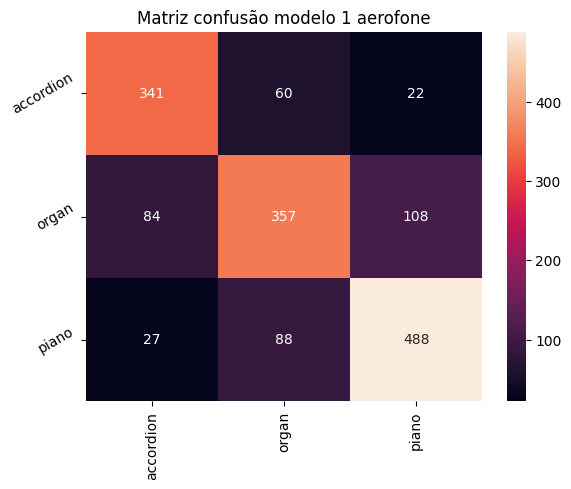

In [31]:
ac.matriz_confusion(
    results_aerofone_01['y_validate'],
    results_aerofone_01['predictions'],
    labels=np.unique(results_aerofone_01["predictions_cat"]),
    title='Matriz confusão modelo 1 aerofone',
    rename_labels=True
)

### Model 2

- Detected outilers

In [32]:
results_geral.query("base == 'aerofone' & name_model_test == 'Model-02' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
1,euclidean,brute,3,"{'loss': 'log_loss', 'max_bins': 191, 'max_dep...",74.920635,aerofone,HistGradientBoost,Model-02


In [33]:
outlier_model_2_aerofone = ac.detected_outilers_knn(/metric="euclidean", algorithm="brute", neighbors=3, dataframe=df_inst_aerofone)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed outilers

In [34]:
df_inst_aerofone_02 = ac.show_inlers(dataframe=df_inst_aerofone, pred=outlier_model_2_aerofone["predictions"])
df_inst_aerofone_02

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
0,0.010380,0.038218,0.513887,0.581963,0.434641,0.293949,0.317826,0.271148,0.548258,-24.170067,...,2949.581321,3409.640722,2600.055158,1.098243,5260.821321,-44.640682,-30.202150,0.149672,33095,accordion
1,0.084643,-0.035337,0.175587,0.429345,0.840043,0.384524,0.282545,0.346341,0.482365,-90.556145,...,3038.064172,3516.595715,2385.271420,1.360742,5225.124166,-46.575737,-59.323132,0.112181,24785,accordion
2,-0.030127,0.082404,0.453814,0.219808,0.228484,0.446050,0.178916,0.250981,0.327460,-106.124260,...,2735.690428,3256.491175,2069.850731,1.343197,4287.155824,-56.276707,-71.512909,0.096007,21230,accordion
4,-0.049096,-0.029067,0.484400,0.334572,0.441629,0.679485,0.382958,0.326033,0.205775,-226.263824,...,2223.101638,2883.225952,1251.374287,1.339527,2263.034730,-62.227947,-78.196365,0.059804,13214,accordion
5,-0.180964,0.569503,0.371429,0.329753,0.127768,0.165817,0.210350,0.864152,0.316520,-139.586807,...,2394.684608,3055.207315,1213.792172,0.863256,2477.767229,-66.244644,-79.955254,0.051793,11451,accordion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,0.306987,0.197302,0.181270,0.482163,0.806090,0.410171,0.182062,0.128068,0.223802,-208.045074,...,1277.163672,1710.803257,821.680671,0.769584,1623.308746,-52.423000,-75.093781,0.038042,8414,piano
5984,0.339596,0.193580,0.309043,0.115449,0.066983,0.121548,0.543438,0.246675,0.126754,-359.998535,...,1681.556710,2431.230598,704.896231,0.654192,1007.089425,-73.745857,-80.000000,0.042257,9343,piano
5985,0.022141,0.249860,0.019285,0.019074,0.026441,0.062063,0.285675,0.762290,0.256367,-342.691559,...,1672.357525,2406.899185,647.666659,0.788650,1045.659338,-9.425838,-39.180683,0.026027,5747,piano
5986,-0.038987,0.185848,0.182197,0.123432,0.274012,0.223736,0.119671,0.259500,0.083546,-192.736328,...,1112.070824,1570.408078,1094.419047,1.140904,1788.779671,-25.643265,-72.219749,0.081838,18093,piano


- Train model

In [35]:
results_geral.query("base == 'aerofone' & name_model_test == 'Model-02' ")["parametos_models"].iloc[0]

OrderedDict([('loss', 'log_loss'),
             ('max_bins', 191),
             ('max_depth', 6),
             ('min_samples_leaf', 16)])

In [36]:
model = HistGradientBoostingClassifier(
    loss= 'log_loss',
    max_bins=191,
    max_depth=6,
    min_samples_leaf=16
)

results_aerofone_02 = tm.cross_validate_balancead(k=5, model=model, y_pred = "instrumento", dataframe=df_inst_aerofone_02, shap=False)
results_aerofone_02


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=191, max_depth=6, min_samples_leaf=16) do Fold 0: 0.7428571428571429


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=191, max_depth=6, min_samples_leaf=16) do Fold 1: 0.7619047619047619


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=191, max_depth=6, min_samples_leaf=16) do Fold 2: 0.7555555555555555


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=191, max_depth=6, min_samples_leaf=16) do Fold 3: 0.7238095238095238
Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=191, max_depth=6, min_samples_leaf=16) do Fold 4: 0.7619047619047619


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.74285714, 0.76190476, 0.75555556, 0.72380952, 0.76190476]),
 'accuracy_mean': 74.92063492063492,
 'std': 0.014478418096496977,
 'predictions': array([1., 0., 0., ..., 1., 1., 1.]),
 'y_validate': array([0., 0., 0., ..., 2., 2., 2.]),
 'predictions_cat': array(['organ', 'accordion', 'accordion', ..., 'organ', 'organ', 'organ'],
       dtype=object),
 'y_validate_cat': array(['accordion', 'accordion', 'accordion', ..., 'piano', 'piano',
        'piano'], dtype=object)}

- Comparativos

In [37]:
results_aerofone_02['accuracy_mean']

74.92063492063492

In [38]:
results_geral.query("base == 'aerofone' & name_model_test == 'Model-02' ")["accuracy_models"]

1    74.920635
Name: accuracy_models, dtype: float64

- Matrix de confusão

<Axes: title={'center': 'Matriz confusão modelo 2 aerofone'}>

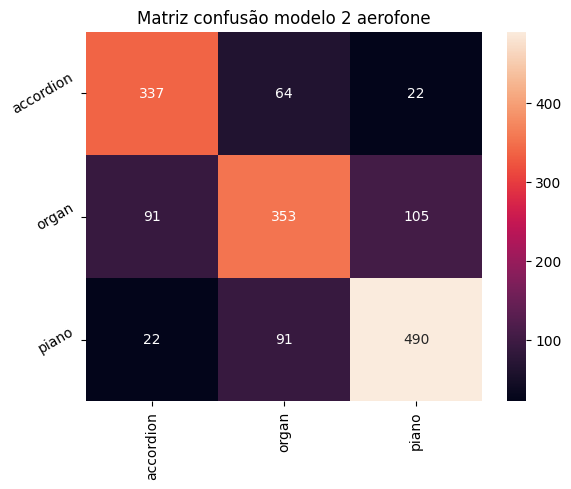

In [39]:
ac.matriz_confusion(
    results_aerofone_02['y_validate'],
    results_aerofone_02['predictions'],
    labels=np.unique(results_aerofone_02["predictions_cat"]),
    title='Matriz confusão modelo 2 aerofone',
    rename_labels=True
)

### Model 3

- Detected outilers

In [40]:
results_geral.query("base == 'aerofone' & name_model_test == 'Model-03' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
2,manhattan,kd_tree,3,"{'eta': 0.05463933264807607, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost,Model-03


In [41]:
outlier_model_3_aerofone = ac.detected_outilers_knn(metric="manhattan", algorithm="kd_tree", neighbors=3, dataframe=df_inst_aerofone)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Remover outilers

In [42]:
df_inst_aerofone_03 = ac.show_inlers(dataframe=df_inst_aerofone, pred=outlier_model_3_aerofone["predictions"])
df_inst_aerofone_03

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
0,0.010380,0.038218,0.513887,0.581963,0.434641,0.293949,0.317826,0.271148,0.548258,-24.170067,...,2949.581321,3409.640722,2600.055158,1.098243,5260.821321,-44.640682,-30.202150,0.149672,33095,accordion
1,0.084643,-0.035337,0.175587,0.429345,0.840043,0.384524,0.282545,0.346341,0.482365,-90.556145,...,3038.064172,3516.595715,2385.271420,1.360742,5225.124166,-46.575737,-59.323132,0.112181,24785,accordion
2,-0.030127,0.082404,0.453814,0.219808,0.228484,0.446050,0.178916,0.250981,0.327460,-106.124260,...,2735.690428,3256.491175,2069.850731,1.343197,4287.155824,-56.276707,-71.512909,0.096007,21230,accordion
4,-0.049096,-0.029067,0.484400,0.334572,0.441629,0.679485,0.382958,0.326033,0.205775,-226.263824,...,2223.101638,2883.225952,1251.374287,1.339527,2263.034730,-62.227947,-78.196365,0.059804,13214,accordion
5,-0.180964,0.569503,0.371429,0.329753,0.127768,0.165817,0.210350,0.864152,0.316520,-139.586807,...,2394.684608,3055.207315,1213.792172,0.863256,2477.767229,-66.244644,-79.955254,0.051793,11451,accordion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,0.306987,0.197302,0.181270,0.482163,0.806090,0.410171,0.182062,0.128068,0.223802,-208.045074,...,1277.163672,1710.803257,821.680671,0.769584,1623.308746,-52.423000,-75.093781,0.038042,8414,piano
5984,0.339596,0.193580,0.309043,0.115449,0.066983,0.121548,0.543438,0.246675,0.126754,-359.998535,...,1681.556710,2431.230598,704.896231,0.654192,1007.089425,-73.745857,-80.000000,0.042257,9343,piano
5985,0.022141,0.249860,0.019285,0.019074,0.026441,0.062063,0.285675,0.762290,0.256367,-342.691559,...,1672.357525,2406.899185,647.666659,0.788650,1045.659338,-9.425838,-39.180683,0.026027,5747,piano
5986,-0.038987,0.185848,0.182197,0.123432,0.274012,0.223736,0.119671,0.259500,0.083546,-192.736328,...,1112.070824,1570.408078,1094.419047,1.140904,1788.779671,-25.643265,-72.219749,0.081838,18093,piano


- Train Model

In [43]:
list(results_geral.query("base == 'aerofone' & name_model_test == 'Model-03' ")["parametos_models"])

[OrderedDict([('eta', 0.05463933264807607),
              ('gamma', 1),
              ('learning_rate', 0.22243928452239042),
              ('max_depth', 8),
              ('subsample', 0.7111944642473313)])]

In [44]:
model = XGBClassifier(
    eta=0.05463933264807607,
    gamma=1,
    learning_rate = 0.22243928452239042,
    max_depth=8,
    subsample= 0.7111944642473313,
)

results_aerofone_03 = tm.cross_validate_balancead(k=5, model=model, y_pred='instrumento', dataframe=df_inst_aerofone_03, shap=False)
results_aerofone_03


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05463933264807607,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22243928452239042,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.7047619047619048


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05463933264807607,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22243928452239042,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 1: 0.7492063492063492


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05463933264807607,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22243928452239042,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 2: 0.7111111111111111


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05463933264807607,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22243928452239042,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 3: 0.6952380952380952
Tamanho base: 1575 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.7047619 , 0.74920635, 0.71111111, 0.6952381 , 0.73968254]),
 'accuracy_mean': 72.00000000000001,
 'std': 0.020807580454824056,
 'predictions': array([0., 0., 0., ..., 1., 2., 2.]),
 'y_validate': array([0., 0., 0., ..., 2., 2., 2.]),
 'predictions_cat': array(['accordion', 'accordion', 'accordion', ..., 'organ', 'piano',
        'piano'], dtype=object),
 'y_validate_cat': array(['accordion', 'accordion', 'accordion', ..., 'piano', 'piano',
        'piano'], dtype=object)}

- Comparativo

In [45]:
results_aerofone_03["accuracy_mean"]

72.00000000000001

In [46]:
results_geral.query(" base == 'aerofone' &  name_model_test == 'Model-03' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
2,manhattan,kd_tree,3,"{'eta': 0.05463933264807607, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost,Model-03


- Matriz de confusão

<Axes: title={'center': 'Matriz confusão modelo 3 aerofone'}>

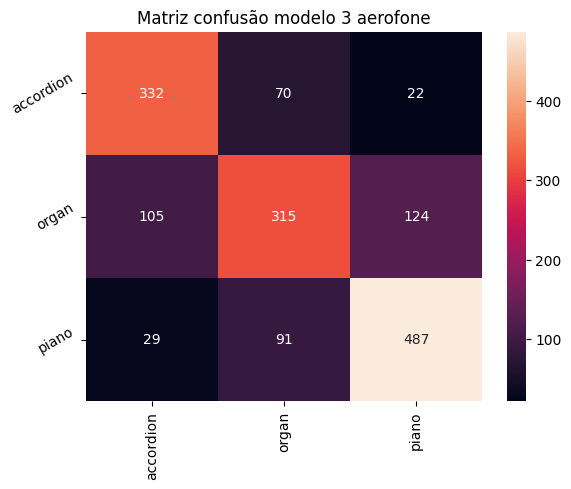

In [47]:
ac.matriz_confusion(
    results_aerofone_03['y_validate'],
    results_aerofone_03['predictions'],
    labels=np.unique(results_aerofone_03["predictions_cat"]),
    title='Matriz confusão modelo 3 aerofone',
    rename_labels=True
)

## Sopro

### Model 1

- Detected outilers

In [48]:
results_geral.query(" base == 'sopro' &  name_model_test == 'Model-01' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
9,manhattan,ball_tree,7,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.10...",72.651235,sopro,XGBoost,Model-01


In [49]:
outlier_model_1_sopro = ac.detected_outilers_knn(metric="manhattan", algorithm="ball_tree", neighbors=7, dataframe=df_inst_sopro)

- Removed outilers

In [50]:
df_inst_sopro_01 = ac.show_inlers(dataframe=df_inst_sopro, pred=outlier_model_1_sopro["predictions"])
df_inst_sopro_01

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
1875,0.060383,0.017910,0.319152,0.367783,0.465361,0.399524,0.357706,0.343498,0.282757,8.203455,...,2788.013960,3239.194180,2328.546611,1.093156,5092.952266,-52.844872,-68.585281,0.105613,23362,clarinet
1877,-0.102407,-0.053821,0.007352,0.016456,0.251515,0.982690,0.649991,0.123668,0.015163,-170.240860,...,2897.624046,3532.073752,1571.665681,0.959548,3635.089465,-61.261280,-78.551147,0.036253,8015,clarinet
1879,0.137429,-0.165245,0.004996,0.004829,0.009536,0.313501,1.000000,0.247865,0.029246,-200.479965,...,2826.243637,3529.484253,1302.617113,0.927032,2510.017073,-61.047974,-77.810928,0.029619,6548,clarinet
1880,0.236781,-0.104811,0.360671,0.143619,0.062925,0.141207,0.458111,0.159797,0.037194,-225.307404,...,1788.755359,2379.025103,1104.750913,1.166350,1975.259208,-66.297119,-78.115021,0.066677,14813,clarinet
1881,0.251144,0.276060,0.757470,0.276578,0.013081,0.137285,0.914434,0.177750,0.035843,-196.740616,...,1827.789583,2551.677641,930.040460,0.972946,1324.891525,-62.295158,-79.964806,0.063943,14130,clarinet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,0.031326,0.036042,0.281165,0.467478,0.383710,0.385898,0.358991,0.379168,0.286116,-221.750122,...,1515.887247,2040.836138,896.653459,1.242603,1782.859289,-42.632786,-42.830780,0.041767,9231,trumpet
7162,0.024069,-0.064162,0.038717,0.051984,0.156484,0.528343,0.865360,0.228249,0.063890,-213.012329,...,1888.383070,2528.740114,1280.731144,1.535133,1930.644010,-52.891537,-79.643761,0.078466,17360,trumpet
7163,0.046916,0.068088,0.517141,0.282860,0.547268,0.444383,0.516097,0.406917,0.322084,-35.486549,...,3132.678849,3643.088516,2309.708871,1.049440,5199.019529,-37.911655,-57.435429,0.095421,21114,trumpet
7164,0.109233,0.002179,0.271734,0.290186,0.454663,0.332584,0.266866,0.341721,0.481044,-134.787796,...,2965.252571,3440.696663,2370.998419,1.259253,5153.205266,-53.025776,-79.120621,0.126226,27933,trumpet


- Train Model

In [51]:
results_geral.query(" base == 'sopro' &  name_model_test == 'Model-01' ")["parametos_models"].iloc[0]

OrderedDict([('eta', 0.2),
             ('gamma', 0),
             ('learning_rate', 0.10315464633026669),
             ('max_depth', 20),
             ('subsample', 0.5)])

In [52]:
model = XGBClassifier(
    eta=0.2,
    gamma=0,
    learning_rate = 0.10315464633026669,
    max_depth=20,
    subsample=0.5
)

results_sopro_01 = tm.cross_validate_balancead(k=5, model=model, y_pred='instrumento', dataframe=df_inst_sopro_01, shap=False)
results_sopro_01



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10315464633026669, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.7379310344827587


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10315464633026669, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 1: 0.7206896551724138


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10315464633026669, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 2: 0.7310344827586207


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10315464633026669, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 3: 0.6851211072664359
Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_byn

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.73793103, 0.72068966, 0.73103448, 0.68512111, 0.75778547]),
 'accuracy_mean': 72.65123493616514,
 'std': 0.02398325517935685,
 'predictions': array([2., 1., 1., ..., 2., 2., 2.]),
 'y_validate': array([0., 0., 0., ..., 4., 4., 4.]),
 'predictions_cat': array(['saxophone', 'flute', 'flute', ..., 'saxophone', 'saxophone',
        'saxophone'], dtype=object),
 'y_validate_cat': array(['clarinet', 'clarinet', 'clarinet', ..., 'trumpet', 'trumpet',
        'trumpet'], dtype=object)}

- Comparativos

In [53]:
results_geral.query(" base == 'sopro' &  name_model_test == 'Model-01' ")["accuracy_models"]

9    72.651235
Name: accuracy_models, dtype: float64

In [54]:
results_sopro_01["accuracy_mean"]

72.65123493616514

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão modelo 1 sopro'}>

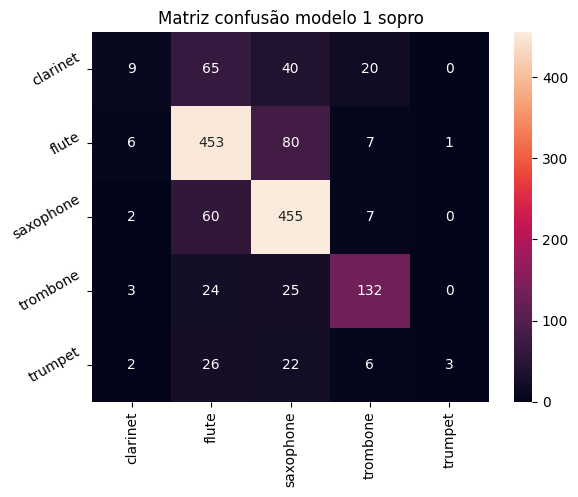

In [55]:
ac.matriz_confusion(
    results_sopro_01['y_validate'],
    results_sopro_01['predictions'],
    labels=np.unique(results_sopro_01["predictions_cat"]),
    title='Matriz confusão modelo 1 sopro',
    rename_labels=True
)

### Model 2

- Detected outilers

In [56]:
results_geral.query("base == 'sopro' & name_model_test == 'Model-02' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
10,euclidean,kd_tree,5,"{'eta': 0.017982161175003848, 'gamma': 0, 'lea...",72.513304,sopro,XGBoost,Model-02


In [57]:
outlier_model_2_sopro = ac.detected_outilers_knn(metric="euclidean", algorithm="kd_tree", neighbors=5, dataframe=df_inst_sopro)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed outilers

In [58]:
df_inst_sopro_02 = ac.show_inlers(dataframe=df_inst_sopro, pred=outlier_model_2_sopro["predictions"])
df_inst_sopro_02

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
1875,0.060383,0.017910,0.319152,0.367783,0.465361,0.399524,0.357706,0.343498,0.282757,8.203455,...,2788.013960,3239.194180,2328.546611,1.093156,5092.952266,-52.844872,-68.585281,0.105613,23362,clarinet
1877,-0.102407,-0.053821,0.007352,0.016456,0.251515,0.982690,0.649991,0.123668,0.015163,-170.240860,...,2897.624046,3532.073752,1571.665681,0.959548,3635.089465,-61.261280,-78.551147,0.036253,8015,clarinet
1879,0.137429,-0.165245,0.004996,0.004829,0.009536,0.313501,1.000000,0.247865,0.029246,-200.479965,...,2826.243637,3529.484253,1302.617113,0.927032,2510.017073,-61.047974,-77.810928,0.029619,6548,clarinet
1880,0.236781,-0.104811,0.360671,0.143619,0.062925,0.141207,0.458111,0.159797,0.037194,-225.307404,...,1788.755359,2379.025103,1104.750913,1.166350,1975.259208,-66.297119,-78.115021,0.066677,14813,clarinet
1881,0.251144,0.276060,0.757470,0.276578,0.013081,0.137285,0.914434,0.177750,0.035843,-196.740616,...,1827.789583,2551.677641,930.040460,0.972946,1324.891525,-62.295158,-79.964806,0.063943,14130,clarinet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,0.031326,0.036042,0.281165,0.467478,0.383710,0.385898,0.358991,0.379168,0.286116,-221.750122,...,1515.887247,2040.836138,896.653459,1.242603,1782.859289,-42.632786,-42.830780,0.041767,9231,trumpet
7162,0.024069,-0.064162,0.038717,0.051984,0.156484,0.528343,0.865360,0.228249,0.063890,-213.012329,...,1888.383070,2528.740114,1280.731144,1.535133,1930.644010,-52.891537,-79.643761,0.078466,17360,trumpet
7163,0.046916,0.068088,0.517141,0.282860,0.547268,0.444383,0.516097,0.406917,0.322084,-35.486549,...,3132.678849,3643.088516,2309.708871,1.049440,5199.019529,-37.911655,-57.435429,0.095421,21114,trumpet
7164,0.109233,0.002179,0.271734,0.290186,0.454663,0.332584,0.266866,0.341721,0.481044,-134.787796,...,2965.252571,3440.696663,2370.998419,1.259253,5153.205266,-53.025776,-79.120621,0.126226,27933,trumpet


- Train model

In [59]:
list(results_geral.query("base == 'sopro' & name_model_test == 'Model-02' ")["parametos_models"])

[OrderedDict([('eta', 0.017982161175003848),
              ('gamma', 0),
              ('learning_rate', 0.19534790296680066),
              ('max_depth', 8),
              ('subsample', 0.8115491481353408)])]

In [60]:
model = XGBClassifier(
    eta=0.017983161175003848,
    gamma=0,
    learning_rate=0.19534790396680066,
    max_depth=8,
    subsample=0.8115491481353408,
)

results_sopro_02 = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_sopro_02, y_pred="instrumento", shap=False)
results_sopro_02


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01798316117500385,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19534790396680066,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.7379310344827587


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01798316117500385,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19534790396680066,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 1: 0.696551724137931


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01798316117500385,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19534790396680066,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 2: 0.7482758620689656


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01798316117500385,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19534790396680066,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 3: 0.6782006920415224
Tamanho base: 1448 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.73793103, 0.69655172, 0.74827586, 0.67820069, 0.76470588]),
 'accuracy_mean': 72.51330390168236,
 'std': 0.03251130766145901,
 'predictions': array([4., 1., 1., ..., 1., 2., 1.]),
 'y_validate': array([0., 0., 0., ..., 4., 4., 4.]),
 'predictions_cat': array(['trumpet', 'flute', 'flute', ..., 'flute', 'saxophone', 'flute'],
       dtype=object),
 'y_validate_cat': array(['clarinet', 'clarinet', 'clarinet', ..., 'trumpet', 'trumpet',
        'trumpet'], dtype=object)}

- Comparativos

In [61]:
results_geral.query("base == 'sopro' & name_model_test == 'Model-02' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
10,euclidean,kd_tree,5,"{'eta': 0.017982161175003848, 'gamma': 0, 'lea...",72.513304,sopro,XGBoost,Model-02


In [62]:
results_sopro_02['accuracy_mean']

72.51330390168236

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão modelo 2 sopro'}>

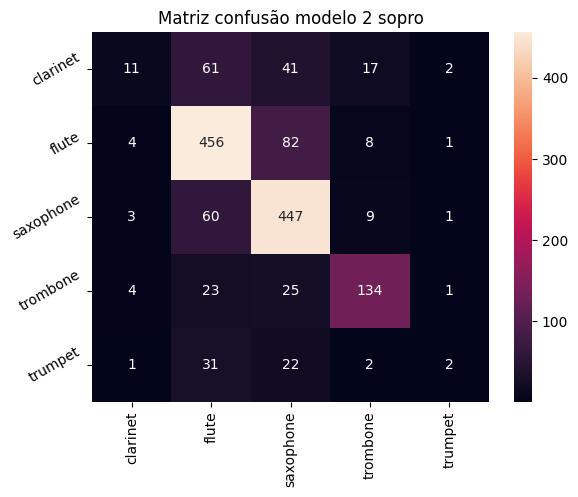

In [63]:
ac.matriz_confusion(
    results_sopro_02['y_validate'],
    results_sopro_02['predictions'],
    labels=np.unique(results_sopro_02["predictions_cat"]),
    title='Matriz confusão modelo 2 sopro',
    rename_labels=True
)

### Model 3

- Detected outilers

In [64]:
results_geral.query("base == 'sopro' &  name_model_test == 'Model-03' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
11,minkowski,ball_tree,3,"{'loss': 'log_loss', 'max_bins': 231, 'max_dep...",72.513065,sopro,HistGradientBoost,Model-03


In [65]:
outlier_model_3_sopro = ac.detected_outilers_knn(metric="minkowski", algorithm="ball_tree", neighbors=3, dataframe=df_inst_sopro)

- Removed outilers

In [66]:
df_inst_sopro_03 = ac.show_inlers(dataframe=df_inst_sopro, pred=outlier_model_3_sopro["predictions"])
df_inst_sopro_03

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
1875,0.060383,0.017910,0.319152,0.367783,0.465361,0.399524,0.357706,0.343498,0.282757,8.203455,...,2788.013960,3239.194180,2328.546611,1.093156,5092.952266,-52.844872,-68.585281,0.105613,23362,clarinet
1877,-0.102407,-0.053821,0.007352,0.016456,0.251515,0.982690,0.649991,0.123668,0.015163,-170.240860,...,2897.624046,3532.073752,1571.665681,0.959548,3635.089465,-61.261280,-78.551147,0.036253,8015,clarinet
1879,0.137429,-0.165245,0.004996,0.004829,0.009536,0.313501,1.000000,0.247865,0.029246,-200.479965,...,2826.243637,3529.484253,1302.617113,0.927032,2510.017073,-61.047974,-77.810928,0.029619,6548,clarinet
1880,0.236781,-0.104811,0.360671,0.143619,0.062925,0.141207,0.458111,0.159797,0.037194,-225.307404,...,1788.755359,2379.025103,1104.750913,1.166350,1975.259208,-66.297119,-78.115021,0.066677,14813,clarinet
1881,0.251144,0.276060,0.757470,0.276578,0.013081,0.137285,0.914434,0.177750,0.035843,-196.740616,...,1827.789583,2551.677641,930.040460,0.972946,1324.891525,-62.295158,-79.964806,0.063943,14130,clarinet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,0.031326,0.036042,0.281165,0.467478,0.383710,0.385898,0.358991,0.379168,0.286116,-221.750122,...,1515.887247,2040.836138,896.653459,1.242603,1782.859289,-42.632786,-42.830780,0.041767,9231,trumpet
7162,0.024069,-0.064162,0.038717,0.051984,0.156484,0.528343,0.865360,0.228249,0.063890,-213.012329,...,1888.383070,2528.740114,1280.731144,1.535133,1930.644010,-52.891537,-79.643761,0.078466,17360,trumpet
7163,0.046916,0.068088,0.517141,0.282860,0.547268,0.444383,0.516097,0.406917,0.322084,-35.486549,...,3132.678849,3643.088516,2309.708871,1.049440,5199.019529,-37.911655,-57.435429,0.095421,21114,trumpet
7164,0.109233,0.002179,0.271734,0.290186,0.454663,0.332584,0.266866,0.341721,0.481044,-134.787796,...,2965.252571,3440.696663,2370.998419,1.259253,5153.205266,-53.025776,-79.120621,0.126226,27933,trumpet


- Train model

In [67]:
list(results_geral.query("base == 'sopro' &  name_model_test == 'Model-03' ")["parametos_models"])

[OrderedDict([('loss', 'log_loss'),
              ('max_bins', 231),
              ('max_depth', 15),
              ('min_samples_leaf', 20)])]

In [68]:
model = HistGradientBoostingClassifier(
    loss= 'log_loss',
    max_bins=231,
    max_depth=15,
    min_samples_leaf=20
)

results_sopro_03 = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_sopro_03, y_pred="instrumento", shap=False)
results_sopro_03


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=231, max_depth=15) do Fold 0: 0.7448275862068966


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=231, max_depth=15) do Fold 1: 0.7068965517241379


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=231, max_depth=15) do Fold 2: 0.7344827586206897


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1448 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=231, max_depth=15) do Fold 3: 0.6816608996539792
Tamanho base: 1448 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=231, max_depth=15) do Fold 4: 0.7577854671280276


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.74482759, 0.70689655, 0.73448276, 0.6816609 , 0.75778547]),
 'accuracy_mean': 72.51306526667463,
 'std': 0.027436726657295664,
 'predictions': array([2., 1., 1., ..., 2., 2., 1.]),
 'y_validate': array([0., 0., 0., ..., 4., 4., 4.]),
 'predictions_cat': array(['saxophone', 'flute', 'flute', ..., 'saxophone', 'saxophone',
        'flute'], dtype=object),
 'y_validate_cat': array(['clarinet', 'clarinet', 'clarinet', ..., 'trumpet', 'trumpet',
        'trumpet'], dtype=object)}

- Comparativos

In [69]:
results_geral.query("base == 'sopro' & name_model_test == 'Model-03' ")['accuracy_models']

11    72.513065
Name: accuracy_models, dtype: float64

In [70]:
results_sopro_03["accuracy_mean"]

72.51306526667463

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão modelo 3 sopro'}>

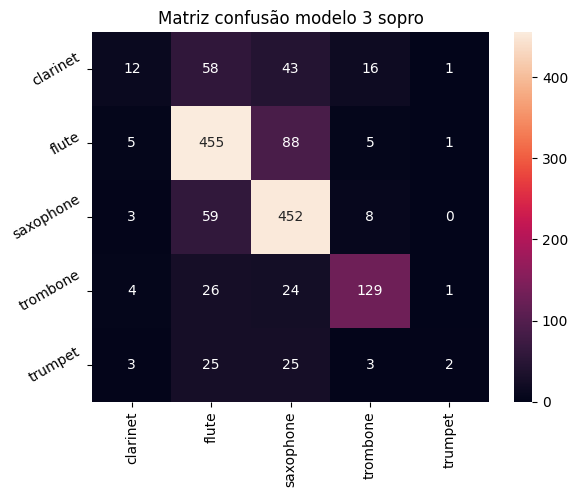

In [71]:
ac.matriz_confusion(
    results_sopro_03['y_validate'],
    results_sopro_03['predictions'],
    labels=np.unique(results_sopro_03["predictions_cat"]),
    title='Matriz confusão modelo 3 sopro',
    rename_labels=True
)


## Percusão 

### Model 1

- Detected outilers

In [72]:
results_geral.query("base == 'percusao' & name_model_test == 'Model-01' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
6,manhattan,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",76.824098,percusao,HistGradientBoost,Model-01


In [73]:
outlier_model_1_percusao = ac.detected_outilers_knn(metric="manhattan", algorithm="brute", neighbors=3, dataframe=df_inst_percusao)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed outilers

In [74]:
df_inst_percusao_01 = ac.show_inlers(dataframe=df_inst_percusao, pred=outlier_model_1_percusao["predictions"])
df_inst_percusao_01

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
2027,0.040087,0.116203,0.409334,0.260820,0.298635,0.223068,0.472596,0.682380,0.315802,-324.986115,...,3251.281106,3634.193997,2843.107702,0.915473,6288.444728,-72.321693,-79.942192,0.106036,23418,cymbals
2028,0.064332,-0.023445,0.221986,0.318158,0.420399,0.800723,0.699277,0.292424,0.310495,-92.665298,...,2337.330183,2783.919958,2549.517812,1.755609,4183.087002,-47.144733,-65.961197,0.182486,40358,cymbals
2029,-0.039875,0.021506,0.597219,0.522248,0.357256,0.306705,0.454092,0.676822,0.459109,-167.831787,...,2635.421460,3093.350146,2543.370274,0.869033,4545.004690,-59.076328,-70.129898,0.152626,33743,cymbals
2030,-0.039822,0.028304,0.621655,0.511336,0.348413,0.316168,0.392748,0.568508,0.565586,-389.340240,...,3258.721397,3709.821567,2479.813426,1.396642,5702.476809,-63.114140,-71.209488,0.082574,18250,cymbals
2031,0.098013,0.027428,0.383891,0.186740,0.131834,0.186899,0.345623,0.210410,0.242533,-169.979294,...,2936.996454,3467.632804,2037.566496,1.731518,4412.483063,-56.386051,-59.750889,0.079232,17508,cymbals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,0.113357,0.063352,0.217164,0.143870,0.322778,0.112114,0.120639,0.256409,0.116839,-342.947083,...,3143.437235,3775.912095,1661.007320,1.292728,3554.577269,-43.292679,-54.901520,0.055292,12232,mallet_percussion
4582,0.264473,-0.245898,0.214395,0.094173,0.177360,0.087018,0.063969,0.138096,0.353633,-242.346970,...,3235.252757,3803.817212,1984.641346,1.996110,4595.240504,-66.942772,-78.150574,0.064426,14272,mallet_percussion
4583,0.087865,-0.048417,0.321572,0.221088,0.240128,0.374176,0.547956,0.418325,0.338949,-51.251186,...,3278.005285,3608.456357,3307.151107,1.378473,6980.305045,-56.667892,-75.132233,0.158234,35032,mallet_percussion
4584,0.432549,0.102409,0.204631,0.283638,0.785254,0.440283,0.356656,0.148266,0.208002,-166.508652,...,2468.935453,3119.488734,1533.762409,1.141370,2913.027706,-68.506294,-79.922241,0.079375,17537,mallet_percussion


- Train model

In [75]:
list(results_geral.query("base == 'percusao' & name_model_test == 'Model-01' ")["parametos_models"])

[OrderedDict([('loss', 'categorical_crossentropy'),
              ('max_bins', 165),
              ('max_depth', 14),
              ('min_samples_leaf', 20)])]

In [76]:
model = HistGradientBoostingClassifier(
    loss= 'categorical_crossentropy',
    max_bins=165,
    max_depth=14,
    min_samples_leaf=20
)

results_percusao_01 = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_percusao_01, y_pred="instrumento", shap=False)
results_percusao_01


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=165,
                               max_depth=14) do Fold 0: 0.7402135231316725


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=165,
                               max_depth=14) do Fold 1: 0.7224199288256228


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=165,
                               max_depth=14) do Fold 2: 0.8035714285714286


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=165,
                               max_depth=14) do Fold 3: 0.7821428571428571
Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=165,
                               max_depth=14) do Fold 4: 0.7928571428571428


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.74021352, 0.72241993, 0.80357143, 0.78214286, 0.79285714]),
 'accuracy_mean': 76.82409761057447,
 'std': 0.031408805540464636,
 'predictions': array([2., 0., 0., ..., 0., 2., 2.]),
 'y_validate': array([0., 0., 0., ..., 2., 2., 2.]),
 'predictions_cat': array(['mallet_percussion', 'cymbals', 'cymbals', ..., 'cymbals',
        'mallet_percussion', 'mallet_percussion'], dtype=object),
 'y_validate_cat': array(['cymbals', 'cymbals', 'cymbals', ..., 'mallet_percussion',
        'mallet_percussion', 'mallet_percussion'], dtype=object)}

- Comparativos

In [77]:
results_percusao_01["accuracy_mean"]

76.82409761057447

In [78]:
results_geral.query(" base == 'percusao' & name_model_test == 'Model-01' ")["accuracy_models"]

6    76.824098
Name: accuracy_models, dtype: float64

- Matrix de confusão

<Axes: title={'center': 'Matriz confusão modelo 1 percusao'}>

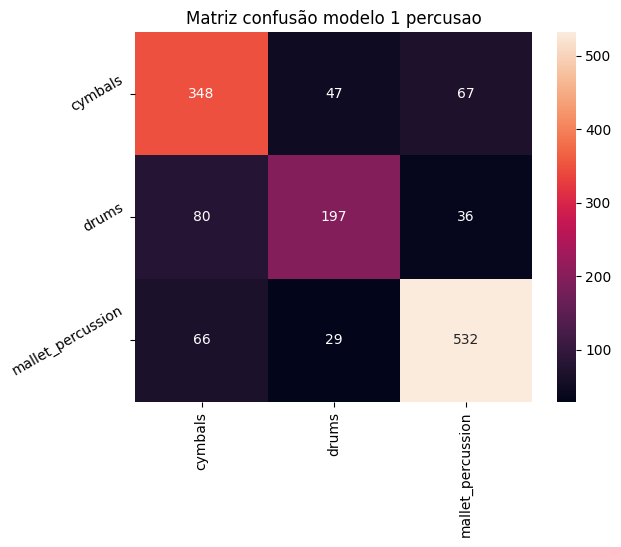

In [79]:
ac.matriz_confusion(
    results_percusao_01['y_validate'],
    results_percusao_01['predictions'],
    labels=np.unique(results_percusao_01["predictions_cat"]),
    title='Matriz confusão modelo 1 percusao',
    rename_labels=True
)

### Model 2

- Detected Outilers 

In [80]:
results_geral.query(" base == 'percusao' & name_model_test == 'Model-02' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
7,minkowski,ball_tree,9,"{'loss': 'categorical_crossentropy', 'max_bins...",76.752415,percusao,HistGradientBoost,Model-02


In [81]:
outlier_model_2_percusao = ac.detected_outilers_knn(metric="minkowski", algorithm="ball_tree", neighbors=9, dataframe=df_inst_percusao)

- Removed outilers

In [82]:
df_inst_percusao_02 = ac.show_inlers(dataframe=df_inst_percusao, pred=outlier_model_2_percusao["predictions"])
df_inst_percusao_02

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
2027,0.040087,0.116203,0.409334,0.260820,0.298635,0.223068,0.472596,0.682380,0.315802,-324.986115,...,3251.281106,3634.193997,2843.107702,0.915473,6288.444728,-72.321693,-79.942192,0.106036,23418,cymbals
2028,0.064332,-0.023445,0.221986,0.318158,0.420399,0.800723,0.699277,0.292424,0.310495,-92.665298,...,2337.330183,2783.919958,2549.517812,1.755609,4183.087002,-47.144733,-65.961197,0.182486,40358,cymbals
2029,-0.039875,0.021506,0.597219,0.522248,0.357256,0.306705,0.454092,0.676822,0.459109,-167.831787,...,2635.421460,3093.350146,2543.370274,0.869033,4545.004690,-59.076328,-70.129898,0.152626,33743,cymbals
2030,-0.039822,0.028304,0.621655,0.511336,0.348413,0.316168,0.392748,0.568508,0.565586,-389.340240,...,3258.721397,3709.821567,2479.813426,1.396642,5702.476809,-63.114140,-71.209488,0.082574,18250,cymbals
2031,0.098013,0.027428,0.383891,0.186740,0.131834,0.186899,0.345623,0.210410,0.242533,-169.979294,...,2936.996454,3467.632804,2037.566496,1.731518,4412.483063,-56.386051,-59.750889,0.079232,17508,cymbals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,0.113357,0.063352,0.217164,0.143870,0.322778,0.112114,0.120639,0.256409,0.116839,-342.947083,...,3143.437235,3775.912095,1661.007320,1.292728,3554.577269,-43.292679,-54.901520,0.055292,12232,mallet_percussion
4582,0.264473,-0.245898,0.214395,0.094173,0.177360,0.087018,0.063969,0.138096,0.353633,-242.346970,...,3235.252757,3803.817212,1984.641346,1.996110,4595.240504,-66.942772,-78.150574,0.064426,14272,mallet_percussion
4583,0.087865,-0.048417,0.321572,0.221088,0.240128,0.374176,0.547956,0.418325,0.338949,-51.251186,...,3278.005285,3608.456357,3307.151107,1.378473,6980.305045,-56.667892,-75.132233,0.158234,35032,mallet_percussion
4584,0.432549,0.102409,0.204631,0.283638,0.785254,0.440283,0.356656,0.148266,0.208002,-166.508652,...,2468.935453,3119.488734,1533.762409,1.141370,2913.027706,-68.506294,-79.922241,0.079375,17537,mallet_percussion


- Train Model

In [83]:
list(results_geral.query("base == 'percusao' & name_model_test == 'Model-02' ")["parametos_models"])

[OrderedDict([('loss', 'categorical_crossentropy'),
              ('max_bins', 177),
              ('max_depth', 12),
              ('min_samples_leaf', 19)])]

In [84]:
model = HistGradientBoostingClassifier(
    loss= 'categorical_crossentropy',
    max_bins=177,
    max_depth=12,
    min_samples_leaf=19
)

results_percusao_02 = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_percusao_02, shap=False, y_pred="instrumento")
results_percusao_02


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=177,
                               max_depth=12, min_samples_leaf=19) do Fold 0: 0.7366548042704626


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=177,
                               max_depth=12, min_samples_leaf=19) do Fold 1: 0.7295373665480427


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=177,
                               max_depth=12, min_samples_leaf=19) do Fold 2: 0.8035714285714286


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=177,
                               max_depth=12, min_samples_leaf=19) do Fold 3: 0.7857142857142857
Tamanho base: 1402 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=177,
                               max_depth=12, min_samples_leaf=19) do Fold 4: 0.7821428571428571


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.7366548 , 0.72953737, 0.80357143, 0.78571429, 0.78214286]),
 'accuracy_mean': 76.75241484494153,
 'std': 0.029120117276668116,
 'predictions': array([2., 0., 0., ..., 0., 2., 2.]),
 'y_validate': array([0., 0., 0., ..., 2., 2., 2.]),
 'predictions_cat': array(['mallet_percussion', 'cymbals', 'cymbals', ..., 'cymbals',
        'mallet_percussion', 'mallet_percussion'], dtype=object),
 'y_validate_cat': array(['cymbals', 'cymbals', 'cymbals', ..., 'mallet_percussion',
        'mallet_percussion', 'mallet_percussion'], dtype=object)}

- Comparativos

In [85]:
results_geral.query(" base == 'percusao' & name_model_test == 'Model-02' ")["accuracy_models"]

7    76.752415
Name: accuracy_models, dtype: float64

In [86]:
results_percusao_02["accuracy_mean"]

76.75241484494153

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão moodelo 2 Percusão'}>

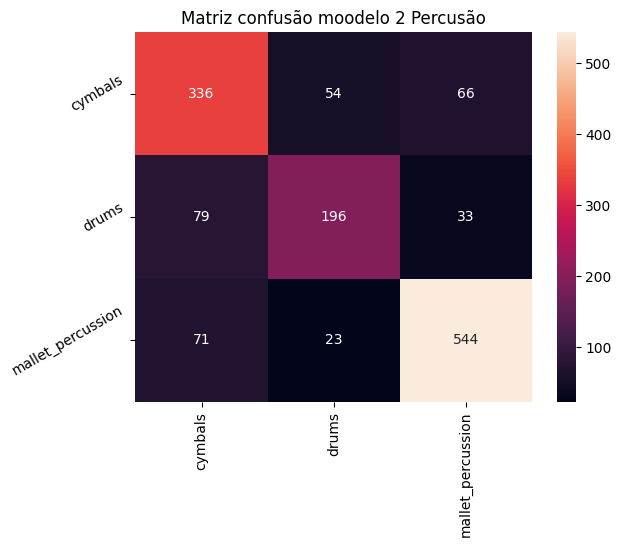

In [87]:
ac.matriz_confusion(
    results_percusao_02['y_validate'],
    results_percusao_02['predictions'], 
    labels=np.unique(results_percusao_02['predictions_cat']),
    title='Matriz confusão moodelo 2 Percusão',
    rename_labels=True
)

### Model 3

- Detected outilers

In [88]:
results_geral.query("base == 'percusao' & name_model_test == 'Model-03' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
8,manhattan,kd_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",76.466701,percusao,XGBoost,Model-03


In [89]:
outlier_model_3_percusao = ac.detected_outilers_knn(metric="manhattan", algorithm="brute", neighbors=5, dataframe=df_inst_percusao)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed outilers

In [90]:
df_inst_percusao_03 = ac.show_inlers(dataframe=df_inst_percusao, pred=outlier_model_3_percusao["predictions"])
df_inst_percusao_03

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
2027,0.040087,0.116203,0.409334,0.260820,0.298635,0.223068,0.472596,0.682380,0.315802,-324.986115,...,3251.281106,3634.193997,2843.107702,0.915473,6288.444728,-72.321693,-79.942192,0.106036,23418,cymbals
2028,0.064332,-0.023445,0.221986,0.318158,0.420399,0.800723,0.699277,0.292424,0.310495,-92.665298,...,2337.330183,2783.919958,2549.517812,1.755609,4183.087002,-47.144733,-65.961197,0.182486,40358,cymbals
2029,-0.039875,0.021506,0.597219,0.522248,0.357256,0.306705,0.454092,0.676822,0.459109,-167.831787,...,2635.421460,3093.350146,2543.370274,0.869033,4545.004690,-59.076328,-70.129898,0.152626,33743,cymbals
2030,-0.039822,0.028304,0.621655,0.511336,0.348413,0.316168,0.392748,0.568508,0.565586,-389.340240,...,3258.721397,3709.821567,2479.813426,1.396642,5702.476809,-63.114140,-71.209488,0.082574,18250,cymbals
2031,0.098013,0.027428,0.383891,0.186740,0.131834,0.186899,0.345623,0.210410,0.242533,-169.979294,...,2936.996454,3467.632804,2037.566496,1.731518,4412.483063,-56.386051,-59.750889,0.079232,17508,cymbals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,-0.055175,0.223582,0.250344,0.144348,0.358254,0.466781,0.185795,0.219963,0.178048,-251.803406,...,2045.443174,2624.499946,1354.596953,2.051116,2461.155187,-68.754555,-77.429588,0.070300,15541,mallet_percussion
4580,0.113357,0.063352,0.217164,0.143870,0.322778,0.112114,0.120639,0.256409,0.116839,-342.947083,...,3143.437235,3775.912095,1661.007320,1.292728,3554.577269,-43.292679,-54.901520,0.055292,12232,mallet_percussion
4582,0.264473,-0.245898,0.214395,0.094173,0.177360,0.087018,0.063969,0.138096,0.353633,-242.346970,...,3235.252757,3803.817212,1984.641346,1.996110,4595.240504,-66.942772,-78.150574,0.064426,14272,mallet_percussion
4583,0.087865,-0.048417,0.321572,0.221088,0.240128,0.374176,0.547956,0.418325,0.338949,-51.251186,...,3278.005285,3608.456357,3307.151107,1.378473,6980.305045,-56.667892,-75.132233,0.158234,35032,mallet_percussion


In [91]:
model = XGBClassifier(
    eta = 0.2,
    gamma = 0,
    learning_rate = 0.06600340843368926,
    max_depth=17,
    subsample=0.5
)

results_percusao_03 = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_percusao_03, y_pred="instrumento", shap=False)
results_percusao_03


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1402 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06600340843368926, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.7437722419928826


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1402 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06600340843368926, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 1: 0.7224199288256228


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1402 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06600340843368926, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 2: 0.7714285714285715


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1402 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06600340843368926, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 3: 0.7928571428571428
Tamanho base: 1402 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_byn

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.74377224, 0.72241993, 0.77142857, 0.79285714, 0.79285714]),
 'accuracy_mean': 76.46670055922723,
 'std': 0.02777226347197739,
 'predictions': array([2., 0., 0., ..., 2., 0., 2.]),
 'y_validate': array([0., 0., 0., ..., 2., 2., 2.]),
 'predictions_cat': array(['mallet_percussion', 'cymbals', 'cymbals', ...,
        'mallet_percussion', 'cymbals', 'mallet_percussion'], dtype=object),
 'y_validate_cat': array(['cymbals', 'cymbals', 'cymbals', ..., 'mallet_percussion',
        'mallet_percussion', 'mallet_percussion'], dtype=object)}

- Comparativos

In [92]:
results_percusao_03["accuracy_mean"]

76.46670055922723

In [93]:
results_geral.query(" base == 'percusao' & name_model_test == 'Model-03' ")["accuracy_models"]

8    76.466701
Name: accuracy_models, dtype: float64

- Matriz de confusão

<Axes: title={'center': 'Matriz confusão moodelo 3 corda'}>

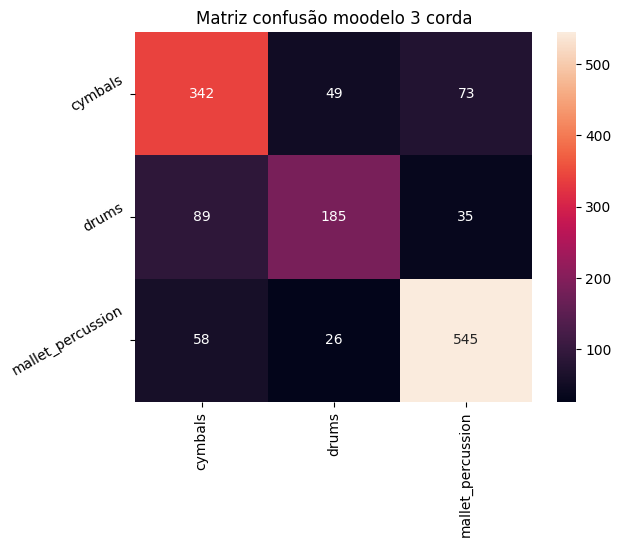

In [94]:
ac.matriz_confusion(
    results_percusao_03['y_validate'],
    results_percusao_03['predictions'], 
    labels=np.unique(results_percusao_03['predictions_cat']),
    title='Matriz confusão moodelo 3 corda',
    rename_labels=True
)   

## Corda

### Model 1

- Detected outilers

In [95]:
results_geral.query(" base == 'corda' & name_model_test == 'Model-01' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
3,euclidean,brute,5,"{'loss': 'auto', 'max_bins': 250, 'max_depth':...",54.882851,corda,HistGradientBoost,Model-01


In [96]:
outlier_model_1_corda = ac.detected_outilers_knn(metric="euclidean", algorithm="brute", neighbors=5, dataframe=df_inst_corda)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed Outilers

In [97]:
df_inst_corda_01 = ac.show_inlers(dataframe=df_inst_corda, pred=outlier_model_1_corda["predictions"])
df_inst_corda_01

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
511,-0.126759,-0.059743,0.413241,0.216319,0.150052,0.123013,0.273308,0.355497,0.252558,-181.227707,...,1837.020805,2277.268596,1463.383714,1.480360,2798.641932,-55.223148,-79.620255,0.084137,18597,banjo
512,-0.031109,-0.064497,0.226724,0.379728,0.534193,0.384524,0.330155,0.257401,0.416313,-92.888756,...,2689.816542,3209.958213,1895.418478,1.607456,3952.566819,-42.981918,-79.185867,0.083941,18554,banjo
513,0.009446,0.006492,0.469337,0.108270,0.112574,0.109360,0.286641,0.663893,0.309304,-113.852753,...,2524.154980,3168.140147,1627.584519,1.189757,2740.437335,-61.928226,-80.000000,0.084799,18757,banjo
514,0.037982,-0.073602,0.340242,0.296036,0.302441,0.279111,0.539927,0.324625,0.385215,-175.193634,...,2859.651147,3374.599471,2266.128437,1.524973,4315.358824,-29.665657,-71.880913,0.120456,26623,banjo
515,0.062163,-0.025827,0.641626,0.313273,0.320937,0.305392,0.414052,0.317208,0.248327,-72.022423,...,2571.712896,3132.946202,1838.567834,1.174259,3889.366118,-61.702564,-79.314026,0.087291,19287,banjo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015,0.155398,0.202623,0.279203,0.175173,0.329897,0.101118,0.119236,0.150895,0.161468,-106.568298,...,2527.549795,3026.877791,2266.961445,1.172216,4213.738093,-42.284138,-79.955719,0.133785,29606,violin
8018,0.181463,-0.109062,0.259089,0.054198,0.135665,0.120070,0.198278,0.268761,0.094458,-233.943954,...,1875.157158,2498.332214,1356.828177,0.969832,2408.271439,-62.397167,-78.355164,0.083315,18430,violin
8019,0.051950,0.691044,0.773323,0.582712,0.532384,0.274606,0.127275,0.109617,0.158079,-260.673492,...,1392.144514,1906.686246,658.017342,1.227272,1367.932950,-35.302883,-68.164001,0.019043,4212,violin
8021,0.093624,-0.031124,0.253249,0.321181,0.309254,0.265595,0.265015,0.155659,0.181344,-128.199768,...,2520.260771,3174.287104,1421.358194,1.173742,2751.578644,-48.512993,-66.277359,0.065123,14407,violin


- Train Model

In [98]:
list(results_geral.query(" base == 'corda' & name_model_test == 'Model-01' ")["parametos_models"])

[OrderedDict([('loss', 'auto'),
              ('max_bins', 250),
              ('max_depth', 13),
              ('min_samples_leaf', 20)])]

In [99]:
model = HistGradientBoostingClassifier(
    loss = "auto",
    max_bins = 250,
    max_depth  = 13,
    min_samples_leaf = 20
)

results_corda_01 = tm.cross_validate_balancead(k=5, model=model,dataframe=df_inst_corda_01, y_pred="instrumento", shap=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=250, max_depth=13) do Fold 0: 0.5203252032520326


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=250, max_depth=13) do Fold 1: 0.556910569105691


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=250, max_depth=13) do Fold 2: 0.5487804878048781


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=250, max_depth=13) do Fold 3: 0.5519348268839104
Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='auto', max_bins=250, max_depth=13) do Fold 4: 0.5661914460285132


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


- comparativos

In [100]:
results_geral.query("base == 'corda' & name_model_test == 'Model-01' ")["accuracy_models"]

3    54.882851
Name: accuracy_models, dtype: float64

In [101]:
results_corda_01["accuracy_mean"]

54.882850661500505

- Matriz de Confusão

<Axes: title={'center': 'Matriz confusão moodelo 1 corda'}>

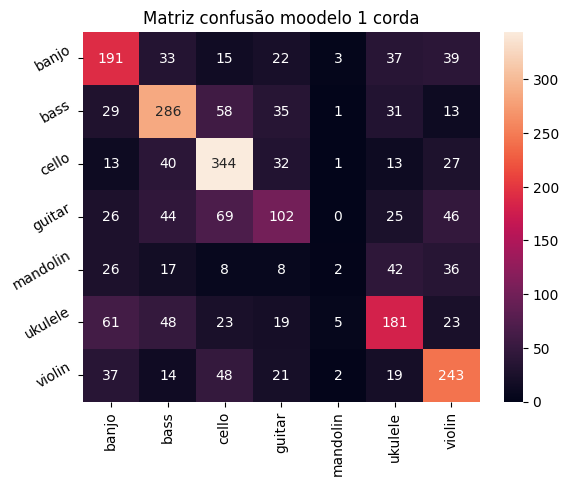

In [102]:
ac.matriz_confusion(
    results_corda_01['y_validate'],
    results_corda_01['predictions'], 
    labels=np.unique(results_corda_01['predictions_cat']),
    title='Matriz confusão moodelo 1 corda',
    rename_labels=True
)
    

### Model 2

- Detected Outilers

In [103]:
results_geral.query("base == 'corda' & name_model_test == 'Model-02' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
4,euclidean,kd_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.719835,corda,HistGradientBoost,Model-02


In [104]:
outlier_model_2_corda = ac.detected_outilers_knn(metric="euclidean", algorithm="kd_tree", neighbors=5, dataframe=df_inst_corda)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed Outilers 

In [105]:
df_inst_corda_02 = ac.show_inlers(dataframe=df_inst_corda, pred=outlier_model_2_corda["predictions"])
df_inst_corda_02

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
511,-0.126759,-0.059743,0.413241,0.216319,0.150052,0.123013,0.273308,0.355497,0.252558,-181.227707,...,1837.020805,2277.268596,1463.383714,1.480360,2798.641932,-55.223148,-79.620255,0.084137,18597,banjo
512,-0.031109,-0.064497,0.226724,0.379728,0.534193,0.384524,0.330155,0.257401,0.416313,-92.888756,...,2689.816542,3209.958213,1895.418478,1.607456,3952.566819,-42.981918,-79.185867,0.083941,18554,banjo
513,0.009446,0.006492,0.469337,0.108270,0.112574,0.109360,0.286641,0.663893,0.309304,-113.852753,...,2524.154980,3168.140147,1627.584519,1.189757,2740.437335,-61.928226,-80.000000,0.084799,18757,banjo
514,0.037982,-0.073602,0.340242,0.296036,0.302441,0.279111,0.539927,0.324625,0.385215,-175.193634,...,2859.651147,3374.599471,2266.128437,1.524973,4315.358824,-29.665657,-71.880913,0.120456,26623,banjo
515,0.062163,-0.025827,0.641626,0.313273,0.320937,0.305392,0.414052,0.317208,0.248327,-72.022423,...,2571.712896,3132.946202,1838.567834,1.174259,3889.366118,-61.702564,-79.314026,0.087291,19287,banjo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015,0.155398,0.202623,0.279203,0.175173,0.329897,0.101118,0.119236,0.150895,0.161468,-106.568298,...,2527.549795,3026.877791,2266.961445,1.172216,4213.738093,-42.284138,-79.955719,0.133785,29606,violin
8018,0.181463,-0.109062,0.259089,0.054198,0.135665,0.120070,0.198278,0.268761,0.094458,-233.943954,...,1875.157158,2498.332214,1356.828177,0.969832,2408.271439,-62.397167,-78.355164,0.083315,18430,violin
8019,0.051950,0.691044,0.773323,0.582712,0.532384,0.274606,0.127275,0.109617,0.158079,-260.673492,...,1392.144514,1906.686246,658.017342,1.227272,1367.932950,-35.302883,-68.164001,0.019043,4212,violin
8021,0.093624,-0.031124,0.253249,0.321181,0.309254,0.265595,0.265015,0.155659,0.181344,-128.199768,...,2520.260771,3174.287104,1421.358194,1.173742,2751.578644,-48.512993,-66.277359,0.065123,14407,violin


- Train Model

In [106]:
list(results_geral.query("base == 'corda' & name_model_test == 'Model-02' ")["parametos_models"])

[OrderedDict([('loss', 'categorical_crossentropy'),
              ('max_bins', 109),
              ('max_depth', 20),
              ('min_samples_leaf', 20)])]

In [107]:
model = HistGradientBoostingClassifier(
    loss = "categorical_crossentropy",
    max_bins =109,
    max_depth  = 20,
    min_samples_leaf = 20,
)

results_corda_02 = tm.cross_validate_balancead(k=5, model=model,dataframe=df_inst_corda_02, y_pred="instrumento", shap=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=109,
                               max_depth=20) do Fold 0: 0.5060975609756098


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=109,
                               max_depth=20) do Fold 1: 0.556910569105691


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=109,
                               max_depth=20) do Fold 2: 0.5650406504065041


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.


Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=109,
                               max_depth=20) do Fold 3: 0.5621181262729125
Tamanho base: 2458 - Acuracia do modelo HistGradientBoostingClassifier(loss='categorical_crossentropy', max_bins=109,
                               max_depth=20) do Fold 4: 0.5458248472505092


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


- Comparativos

In [108]:
results_corda_02["accuracy_mean"]

54.71983508022452

In [109]:
results_geral.query("base == 'corda' & name_model_test == 'Model-02' ")["accuracy_models"]

4    54.719835
Name: accuracy_models, dtype: float64

- Matrix de confusão

<Axes: title={'center': 'Matriz confusão moodelo 2 corda'}>

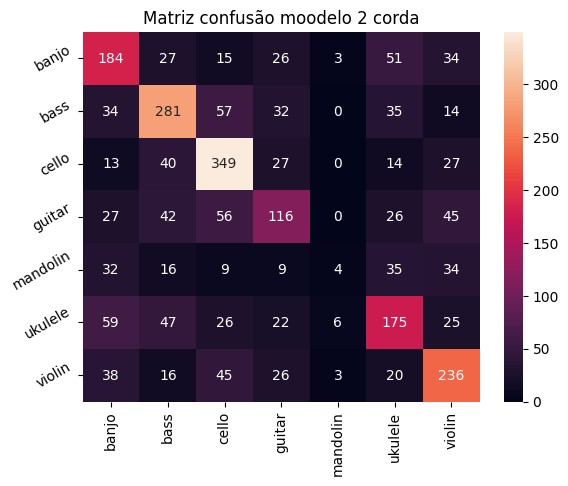

In [110]:
ac.matriz_confusion(
    results_corda_02['y_validate'],
    results_corda_02['predictions'], 
    labels=np.unique(results_corda_02['predictions_cat']),
    title='Matriz confusão moodelo 2 corda',
    rename_labels=True
)

### Model 3

- Detected Outilers

In [111]:
results_geral.query("base == 'corda' & name_model_test == 'Model-03' ")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
5,minkowski,brute,5,"{'eta': 0.03984118437430785, 'gamma': 0, 'lear...",54.638617,corda,XGBoost,Model-03


In [112]:
outlier_model_3_corda = ac.detected_outilers_knn(metric="minkowski", algorithm="brute", neighbors=5, dataframe=df_inst_corda)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed Outilers 

In [113]:
df_inst_corda_03 = ac.show_inlers(dataframe=df_inst_corda, pred=outlier_model_3_corda["predictions"])

- Train Model

In [114]:
list(results_geral.query("base == 'corda' & name_model_test == 'Model-03' ")["parametos_models"])

[OrderedDict([('eta', 0.03984118437430785),
              ('gamma', 0),
              ('learning_rate', 0.17292528451611752),
              ('max_depth', 6),
              ('subsample', 0.9258988894810153)])]

In [115]:
model = XGBClassifier(
    eta = 0.03984118437430785,
    gamma = 0,
    learning_rate = 0.17292528451611752,
    max_depth  = 6,
    subsample = 0.9258988894810153,
)

results_corda_03 = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_corda_03, y_pred="instrumento",)
results_corda_03 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 2458 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.03984118437430785,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17292528451611752,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 0: 0.5203252032520326


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 2458 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.03984118437430785,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17292528451611752,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 1: 0.5548780487804879


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 2458 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.03984118437430785,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17292528451611752,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 2: 0.5467479674796748


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 2458 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.03984118437430785,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17292528451611752,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...) do Fold 3: 0.5580448065173116
Tamanho base: 2458 - Acuracia do modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'folds': array([1., 2., 3., 4., 5.]),
 'accuracy_folds': array([0.5203252 , 0.55487805, 0.54674797, 0.55804481, 0.55193483]),
 'accuracy_mean': 54.63861705826834,
 'std': 0.013550854505422292,
 'predictions': array([3., 0., 0., ..., 1., 6., 6.]),
 'y_validate': array([0., 0., 0., ..., 6., 6., 6.]),
 'predictions_cat': array(['guitar', 'banjo', 'banjo', ..., 'bass', 'violin', 'violin'],
       dtype=object),
 'y_validate_cat': array(['banjo', 'banjo', 'banjo', ..., 'violin', 'violin', 'violin'],
       dtype=object)}

- Comparativos

In [116]:
results_geral.query("base == 'corda' & name_model_test == 'Model-03' ")["accuracy_models"]

5    54.638617
Name: accuracy_models, dtype: float64

In [117]:
results_corda_03["accuracy_mean"]

54.63861705826834

- Matrix de confusão

<Axes: title={'center': 'Matriz confusão moodelo 3 corda'}>

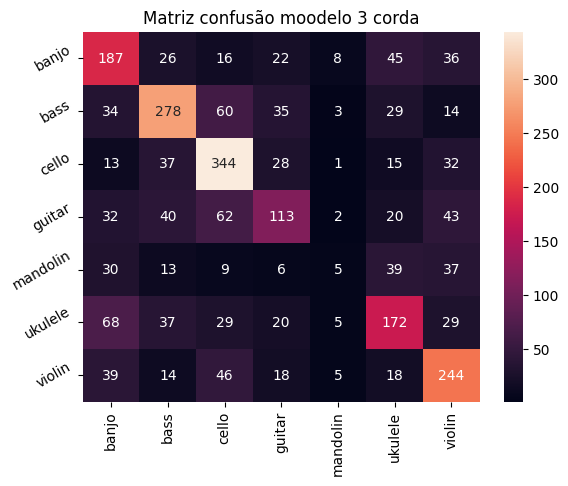

In [118]:
ac.matriz_confusion(
    results_corda_03['y_validate'],
    results_corda_03['predictions'], 
    labels=np.unique(results_corda_03['predictions_cat']),
    title='Matriz confusão moodelo 3 corda',
    rename_labels=True
)

# Resultados Finais - Retreino!

In [119]:
def create_data_results_fold(name_experiments, name_model, data):
    data["experimento"]  = [name_experiments for i in range(len(data["folds"]))]
    data["model"] = [name_model for i in range(len(data["folds"]))]
    keys_select = dict.fromkeys(['folds', 'accuracy_folds', 'experimento', 'model'])
    output = {key: data[key] for key in keys_select.keys()}
    return pd.DataFrame.from_dict(output)

In [120]:
acuracia_cros_val = [
    results_aerofone_01["accuracy_mean"],
    results_aerofone_02["accuracy_mean"], 
    results_aerofone_03["accuracy_mean"],
    results_corda_01["accuracy_mean"], 
    results_corda_02["accuracy_mean"], 
    results_corda_03["accuracy_mean"],
    results_percusao_01["accuracy_mean"],
    results_percusao_02["accuracy_mean"], 
    results_percusao_03["accuracy_mean"],
    results_sopro_01["accuracy_mean"],
    results_sopro_02["accuracy_mean"], 
    results_sopro_03["accuracy_mean"]
]


std_cros_val = [
    results_aerofone_01["std"],
    results_aerofone_02["std"],
    results_aerofone_03["std"],
    results_corda_01["std"],
    results_corda_02["std"],
    results_corda_03["std"],
    results_percusao_01["std"],
    results_percusao_02["std"],
    results_percusao_03["std"], 
    results_sopro_01["std"],
    results_sopro_02["std"],
    results_sopro_03["std"]
]

results_final = results_geral.drop(columns="accuracy_models").copy()
results_final["accuracy_models"] = acuracia_cros_val
results_final["std_accuracy_models"] = std_cros_val

- DataFrame Desempenho por folds

In [277]:
# Aerofone
df_result_aerofone_01 = create_data_results_fold("Model-01", "HistGradientBoost", results_aerofone_01)
df_result_aerofone_02 = create_data_results_fold("Model-02", "HistGradientBoost", results_aerofone_02)
df_result_aerofone_03 = create_data_results_fold("Model-03", "XGBoost", results_aerofone_03)
result_geral_aerofone = pd.concat([df_result_aerofone_01, df_result_aerofone_02, df_result_aerofone_03])

result_geral_aerofone["class_instrumento"] = "aerofone"
# Percusão
df_result_percusao_01 = create_data_results_fold("Model-01", "HistGradientBoost", results_percusao_01)
df_result_percusao_02 = create_data_results_fold("Model-02", "HistGradientBoost", results_percusao_02)
df_result_percusao_03 = create_data_results_fold("Model-03", "HistGradientBoost", results_percusao_03)
result_geral_percusao = pd.concat([df_result_percusao_01, df_result_percusao_02, df_result_percusao_03])
result_geral_percusao["class_instrumento"] = "percusao"

# sopro
df_result_sopro_01 = create_data_results_fold("Model-01", "XGBoost", results_sopro_01)
df_result_sopro_02 = create_data_results_fold("Model-02", "XGBoost", results_sopro_02)
df_result_sopro_03 = create_data_results_fold("Model-03", "HistGradientBoost", results_sopro_03)
result_geral_sopro = pd.concat([df_result_sopro_01, df_result_sopro_02, df_result_sopro_03])
result_geral_sopro["class_instrumento"] = "sopro" 

# corda
df_result_corda_01 = create_data_results_fold("Model-01", "HistGradientBoost", results_corda_01)
df_result_corda_02 = create_data_results_fold("Model-02", "HistGradientBoost", results_corda_02)
df_result_corda_03 = create_data_results_fold("Model-03", "XGBoost", results_corda_03)
result_geral_corda = pd.concat([df_result_corda_01, df_result_corda_02, df_result_corda_03])
result_geral_corda["class_instrumento"] = "corda" 

results_folds_geral = pd.concat([result_geral_corda, result_geral_percusao, result_geral_sopro, result_geral_aerofone])
results_folds_geral["accuracy_folds"] = results_folds_geral.accuracy_folds.round(3) * 100
results_folds_geral["class_instrumento"] = [i.capitalize() for i in results_folds_geral.class_instrumento]

- Grafico de linhas: Acuracia por Folds

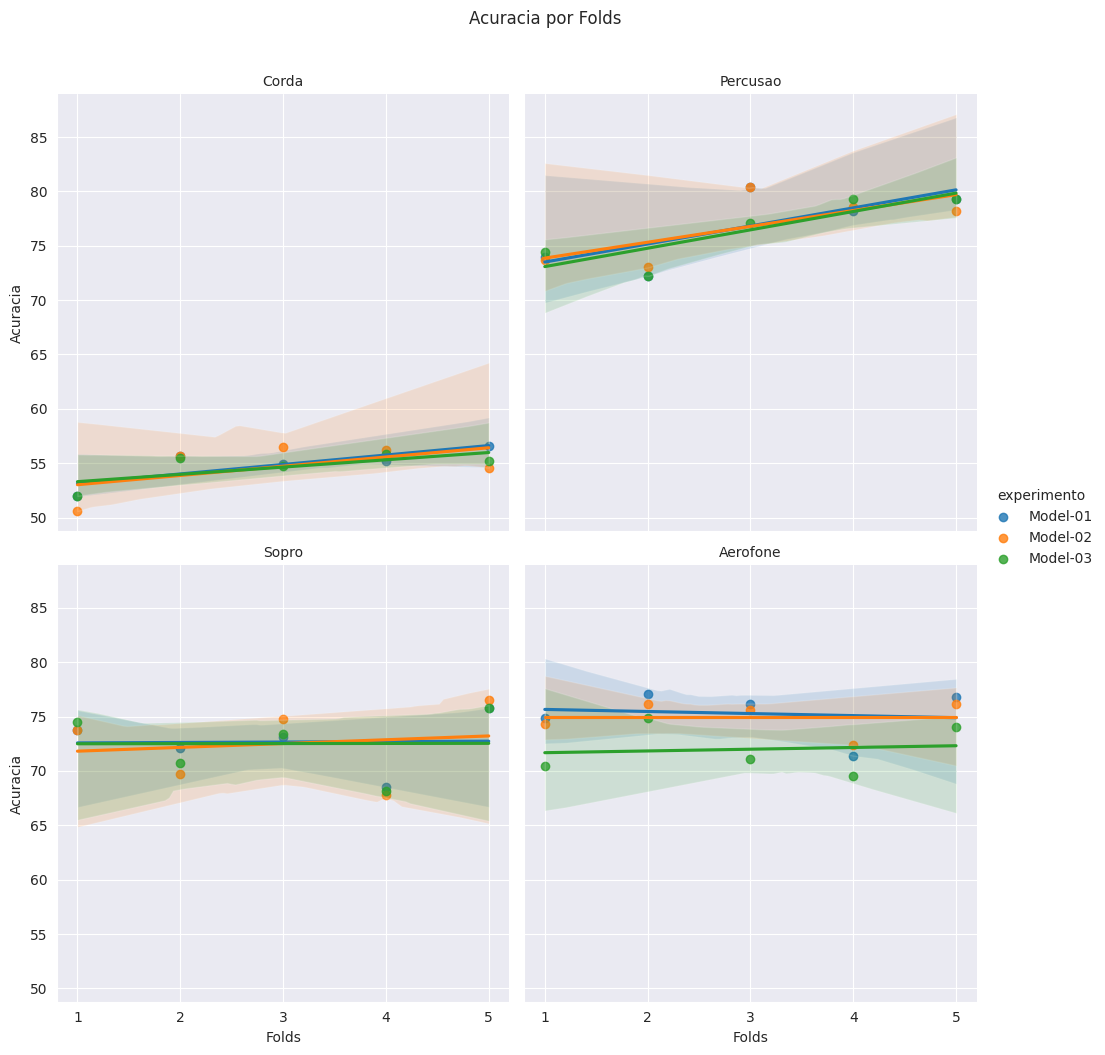

In [287]:
g = sns.lmplot(
    data=results_folds_geral,
    x="folds",
    y="accuracy_folds",
    hue="experimento",
    col="class_instrumento",
    col_wrap=2
)

# Remover o nome "experimento" da legenda
g.set(xticks=range(1, 6))
g.set_titles("{col_name}")

g.fig.suptitle("Acuracia por Folds", y=1.05)
g.set_xlabels("Folds")
g.set_ylabels("Acuracia")

- Grafico de barras: Acuracia por Categoria de Instrumento

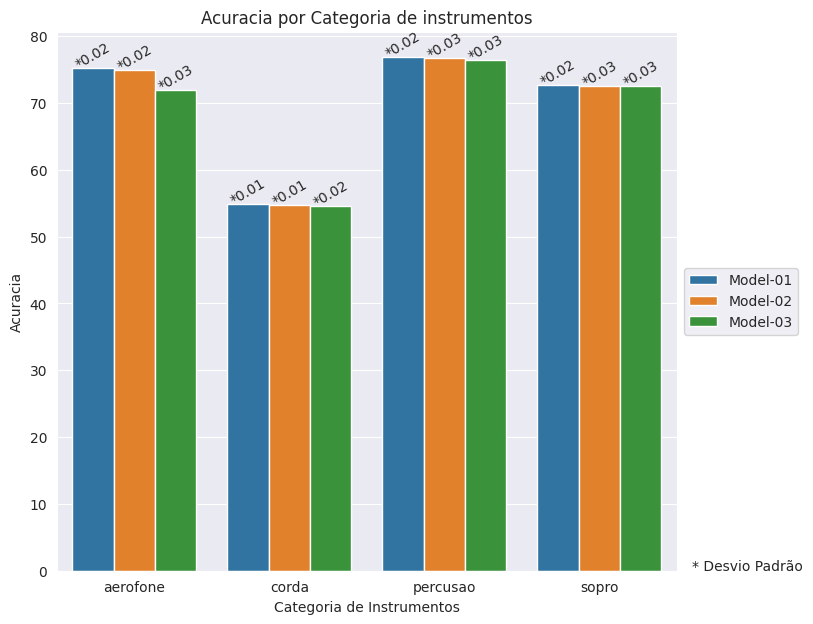

In [261]:
sns.set_style("darkgrid")

# Definindo a altura e largura do gráfico
fig, ax = plt.subplots(figsize=(8, 7))

# Criando o gráfico de barras
sns.barplot(data=results_final, x="base", y="accuracy_models", hue="name_model_test",  ci="sd", capsize=0.1, ax=ax)

# Adicionando o desvio padrão como texto acima de cada barra
y = results_final.accuracy_models.round(2)
std_ac = results_final.std_accuracy_models.round(2) 

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'*{std_ac[i]}', ha='center', rotation=30)

plt.title("Acuracia por Categoria de instrumentos")
plt.text(3.6, 0, '* Desvio Padrão', ha='left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Categoria de Instrumentos")
plt.ylabel("Acuracia")
plt.show()


- Tabela de Resultados

In [ ]:
table_resultados = results_final[['base', 'model','name_model_test', 'accuracy_models', 'std_accuracy_models']].copy()
table_resultados["accuracy_models"] = table_resultados.accuracy_models.round(2) 
table_resultados["std_accuracy_models"] = table_resultados.std_accuracy_models.round(3)

table_resultados = table_resultados.rename(columns={
    "base":"Categoria Instrumento",
    "model":"Modelo",
    "name_model_test":"Experimento",
    "accuracy_models":"Acurácia",
    "std_accuracy_models":"Desvio Padrão"
})
table_resultados

,Categoria Instrumento,Modelo,Experimento,Acurácia,Desvio Padrão
0,aerofone,HistGradientBoost,Model-01,75.30,0.021
1,aerofone,HistGradientBoost,Model-02,74.92,0.014
2,aerofone,XGBoost,Model-03,72.00,0.021
3,corda,HistGradientBoost,Model-01,54.88,0.015
4,corda,HistGradientBoost,Model-02,54.72,0.022
5,corda,XGBoost,Model-03,54.64,0.014
6,percusao,HistGradientBoost,Model-01,76.82,0.031
7,percusao,HistGradientBoost,Model-02,76.75,0.029
8,percusao,XGBoost,Model-03,76.47,0.028
9,sopro,XGBoost,Model-01,72.65,0.024
